In [2]:
'''
Import packages necessary to run script
'''
# def import_packages():
# import tkinter as tk
# from tkinter import filedialog, simpledialog, messagebox
import math
from statistics import mean, stdev
import numpy as np
import pandas as pd
import random
# import os
# %matplotlib inline
# from datetime import datetime
# import matplotlib.pyplot as plt
# import scipy.stats as sps
# import sys
# import scipy.optimize as spo
# return print('packages imported')
# import_packages()

In [3]:
'''
Fetch working directory, and set modules directory
'''
import os, sys
cwd = os.getcwd()
modules_path = cwd + '\Modules\\'
sys.path.insert(1, modules_path)
print(f"Added {modules_path} as modules folder")

Added c:\Users\Matt\Documents\GitHub\GCMS-labeling-curves\Modules\ as modules folder


In [5]:
'''
Set up input and output folders and scan settings
'''
def initial_setup(addfolderswithdate, getinput_type):
    import InitialSetup as InitialSetup
    input_output_folders = InitialSetup.get_folders(withdate=addfolderswithdate)
    settings = InitialSetup.get_data_type(get_input=True)
    return (input_output_folders, settings)

addfolderswithdate, getinput_type = False, True #change this to make new folder with date
initial_setup_output = initial_setup(addfolderswithdate, getinput_type)
file_path_input = initial_setup_output[0][0]
file_path_output = initial_setup_output[0][1]
spectra_scan_type = initial_setup_output[1][0]
areas_scan_type = initial_setup_output[1][1]
spectra_check_string = initial_setup_output[1][2]
print(f"Copy input files to /{file_path_input}")





Copy input files to /Input_Data


In [6]:
'''
Function for retrieving csv file and returning in indicated format
'''
def get_csv(return_type, title, initialdir, skip_blank_lines, skiprows):
    import tkinter as tk
    from tkinter import filedialog
    import GeneralFunctions as GeneralFunctions
    csvfile = tk.filedialog.askopenfilename(title=title, initialdir=initialdir, filetype=(("CSV files", ".csv"), ("all files", "*.*")))
    file = open(csvfile)
    if return_type == 'lines':
        file_lines = GeneralFunctions.get_file_lines(file)
        file.close()
        return(file_lines)
    elif return_type == 'df' :
        file_df = pd.read_csv(file, skip_blank_lines=skip_blank_lines, skiprows=skiprows)
        file.close()
        return(file_df)
    elif return_type == 'both':
        file_df = pd.read_csv(file, skip_blank_lines=skip_blank_lines, skiprows=skiprows)
        file.close()
        file = open(csvfile)
        file_lines = GeneralFunctions.get_file_lines(file)
        file.close()
        return(file_lines, file_df)
print("defined function for retrieving csv files")

defined function for retrieving csv files


In [7]:
'''
Fetch profile in both formats
'''
# profile_lines, profile_df = get_csv(return_type='both', title='Profile', initialdir=file_path_input)
profile_df = get_csv(return_type='df', title='Profile', initialdir=file_path_input, skip_blank_lines=False, skiprows=None)
# can change the return type to lines once I add legacy functionality back in
print("profile file imported")

defined function for exporting aligned peak table as csv
profile file imported


In [8]:
'''
Count the number of features in the profile dataframe
'''
max_feature_count = max(profile_df.count())
min_feature_count = min(profile_df.count())
print(f"{max_feature_count} total features\n {max_feature_count-min_feature_count} feature(s) missing profile data")

16 total features
 0 feature(s) missing profile data


In [9]:
'''
Format and Display the first 5 lines of the profile dataframe
'''
# profile_df['RT'] = profile_df['RT'].astype(float)
# profile_df['Start'] = profile_df['Start'].astype(float)
# profile_df['End'] = profile_df['End'].astype(float)
# profile_df['#Carbons'] = profile_df['#Carbons'].astype(int)
# profile_df['Quasi Mol ion'] = profile_df['Quasi Mol ion'].astype(float)
# profile_df['MW'] = profile_df['MW'].astype(float)
# profile_df['Quasi Mol ion'] = profile_df['Quasi Mol ion'].apply(np.floor)
# profile_df['MW'] = profile_df['MW'].apply(np.floor)
def rename_duplicates(input_series):
    renamed_series = input_series
    series_list = []
    for item in input_series:
        counter = 1
        new_item = str(item)
        while new_item in series_list:
            counter += 1
            new_item = str(item) + '_' + str(counter)
        series_list.append(new_item)
    renamed_series_values = pd.Series(series_list)
    return renamed_series_values

profile_df['Peak'] = rename_duplicates(profile_df['Peak'])
profile_df.head()

,Peak,RT,Start,End,Name,RawMW,#Carbons,Quasi Mol ion,MW,RawMW.1,Exact Mass
0,*Glyoxylate (MeOx & TMS),4.99,4.94,5.08,*Glyoxylate (MeOx & TMS),175.0,2,193.0,175.0,175.0,175.07
1,*Pyruvate (MeOx & TMS),6.24,6.18,6.32,*Pyruvate (MeOx & TMS),189.0,3,207.0,189.0,189.0,189.08
2,*Glycolate (2TMS),6.82,6.77,6.90,*Glycolate (2TMS),220.0,2,238.0,220.0,220.0,220.10
3,*Serine (2TMS),11.38,11.33,11.51,*Serine (2TMS),249.0,3,250.0,249.0,249.0,249.10
4,*Glycine (3TMS),12.58,12.53,12.64,*Glycine (3TMS),291.0,2,292.0,291.0,291.0,291.10


In [10]:
profile_df['Peak']

0        *Glyoxylate (MeOx & TMS)
1          *Pyruvate (MeOx & TMS)
2               *Glycolate (2TMS)
3                  *Serine (2TMS)
4                 *Glycine (3TMS)
5               *Glycerate (3TMS)
6                 Fumarate (2TMS)
7                   Malate (3TMS)
8                Cinnamate (1TMS)
9             (IS) Tropate (2TMS)
10      (IS) Lyxose (MeOx & 4TMS)
11            (IS) Ribitol (5TMS)
12              *Shikimate (4TMS)
13         Fructose (MeOx & 5TMS)
14          Glucose (MeOx & 5TMS)
15    (IS) Octyl Glycoside (4TMS)
Name: Peak, dtype: object

In [11]:
'''
Fetch sample spectra as filelines
'''
spectra_lines = get_csv(return_type='lines', title='Spectra', initialdir=file_path_input, skip_blank_lines=False, skiprows=None)
print("spectra file imported")

spectra file imported


In [12]:
'''
Count the total number of spectra in the spectra file
'''
# Make sure to 'delete' rows, not just clear them in excel otherwise the cells are not actually empty
count_spectra = len(spectra_lines)
print(f"{count_spectra} total spectra lines imported")

208605 total spectra lines imported


In [13]:
'''
Fetch the spectrum for each feature in the spectra input file
'''

def get_sampleID(line_string):
    ## works to return sample ID from full info line
    ## #"+CI Scan (rt: 4.762 min) 210505_NH3-pos-split-scan_361-R2.D  Subtract "
    start_character = "min) "
    end_character = ".D"
    start_index = line_string.rfind(start_character) + len(start_character)
    end_index = line_string.rfind(end_character)
    sampleID = line_string[start_index:end_index]
    return sampleID

def get_spectrum_rt(sample_details):
    ## works to return rt of spectrum from info line
    ## #"+CI Scan (rt: 4.762 min) 210505_NH3-pos-split-scan_361-R2.D  Subtract "
    left_character = "(rt: "
    right_character = " min)"
    left_index = sample_details.find(left_character) + len(left_character)
    right_index = sample_details.find(right_character)
    rt = float(sample_details[left_index:right_index])
    return rt

def fetch_spectra_from_lines(spectra_lines, spectra_check_string):
    print(spectra_check_string)
    all_features_list = []
    ### Add in all features to a list with [[sample name, [rt,[xs],[ys]],[rt,[xs],[ys]],...],[sample name, [rt,[xs],[ys]],[rt,[xs],[ys]],...],...]
    sample_name = "no sample name imported"
    first_spectrum = True
    feature_rt = int
    exceptions = 0
    
    line_counter = 0
    feature_counter = 0
    for line in spectra_lines:
        line_counter += 1
        # go through each line in the spectra file
        if "#" in line:
        # info line or headers
            if spectra_check_string in line:
                # sample & spectra information line
                # new spectrum
                feature_counter +=1
                
                if first_spectrum:
                    #do not append previous spectrum if this is the first one (otherwise appends empty spectrum)
                    spectrum_x, spectrum_y, this_spectrum, this_feature = [],[],[],[] # prepare initial empty lists
                    first_spectrum = False # add next spectrum to list of all spectra
                elif not first_spectrum:
                    # add spectrum to list of all spectra
                    #this_spectrum.append(spectrum_x)
                    #this_spectrum.append(spectrum_y)
                    #this_feature.append(this_spectrum)
                    this_feature.append(spectrum_x)
                    this_feature.append(spectrum_y)
                    all_features_list.append(this_feature)
                spectrum_x, spectrum_y, this_spectrum, this_feature = [],[],[],[] # reset to prepare for next feature with the following properties
                # set the following parameters after appending the previous feature information
                spectrum_rt = get_spectrum_rt(line)
                sample_ID = get_sampleID(line)
                this_feature = [sample_ID, spectrum_rt]
    #             print(all_features_list)

                
        elif len(line) > 2:
            #line containing single m/z and abundance [point,m/z,abundance]
            this_line = line.strip()
            this_line = this_line.split(',')
            
            try:
                spectrum_x.append(float(this_line[1]))
            except:
                print(f'"error in " {this_line}')
            spectrum_y.append(float(this_line[2]))
                
    
    # final spectrum must be appended to the list
#     this_spectrum.append(spectrum_x)
#     this_spectrum.append(spectrum_y)
    this_feature.append(spectrum_x)
    this_feature.append(spectrum_y)
#     this_feature.append(this_spectrum)
    all_features_list.append(this_feature)
#     print(all_features_list)
    print(f"{line_counter} lines processed; spectra extracted for {feature_counter} total features")
    return all_features_list # output as [[sample name,rt,[xs],[ys]],[sample name,rt,[xs],[ys]],...]
print("defined functions for extracting spectra from csv file")


unsorted_spectra = fetch_spectra_from_lines(spectra_lines, spectra_check_string)

defined functions for extracting spectra from csv file
SIM
208605 lines processed; spectra extracted for 9315 total features


In [14]:
'''
sort and organize the list of spectra as a dataframe
'''
def sort_spectra_list(unsorted_spectra):
    columnheaders = 'SampleID', 'RT', 'm/z list', 'Abundance list' # headers for the dataframe
    unsorted_spectra_df = pd.DataFrame(unsorted_spectra, columns = columnheaders) # make a dataframe from the unsorted spectra list with indicated headers
    sorted_spectra_df = unsorted_spectra_df # copy the dataframe before sorting
    sorted_spectra_df = sorted_spectra_df.sort_values(['SampleID', 'RT']) # sort by SampleID then by RT of spectrum
    return sorted_spectra_df # retrun the sorted spectra as a dataframe
print("defined the function for sorting spectra")

sorted_spectra_df = sort_spectra_list(unsorted_spectra)

print(f"sorted all imported spectra\n{len(sorted_spectra_df)} spectra retained from {sorted_spectra_df['SampleID'].nunique()} distinct samples")

defined the function for sorting spectra
sorted all imported spectra
9315 spectra retained from 49 distinct samples


In [15]:
profile_df.head()

,Peak,RT,Start,End,Name,RawMW,#Carbons,Quasi Mol ion,MW,RawMW.1,Exact Mass
0,*Glyoxylate (MeOx & TMS),4.99,4.94,5.08,*Glyoxylate (MeOx & TMS),175.0,2,193.0,175.0,175.0,175.07
1,*Pyruvate (MeOx & TMS),6.24,6.18,6.32,*Pyruvate (MeOx & TMS),189.0,3,207.0,189.0,189.0,189.08
2,*Glycolate (2TMS),6.82,6.77,6.90,*Glycolate (2TMS),220.0,2,238.0,220.0,220.0,220.10
3,*Serine (2TMS),11.38,11.33,11.51,*Serine (2TMS),249.0,3,250.0,249.0,249.0,249.10
4,*Glycine (3TMS),12.58,12.53,12.64,*Glycine (3TMS),291.0,2,292.0,291.0,291.0,291.10


In [16]:
sorted_spectra_df.head()

,SampleID,RT,m/z list,Abundance list
0,231010_460,4.31,"[193.0, 194.0, 195.0]","[5.56015014648438, 1.68616104125977, 0.3915939..."
1,231010_460,4.36,"[193.0, 194.0, 195.0]","[0.341049194335938, 2.31441497802734, 0.329334..."
2,231010_460,4.41,"[193.0, 194.0, 195.0]","[0.0, 1.00374984741211, 6.69082641601563]"
3,231010_460,4.60,"[193.0, 194.0, 195.0]","[6.83512115478516, 1.13663482666016, 0.4113273..."
4,231010_460,4.65,"[193.0, 194.0, 195.0]","[0.686264038085938, 0.246593475341797, 0.0]"


In [17]:
# sorted_spectra_df.to_csv('231104_test', sep=',', na_rep='', index=False)
'''
Confirmed that the data to this point matches manual curration (231104)
'''

'\nConfirmed that the data to this point matches manual curration (231104)\n'

In [18]:
detailed_spectra_df = sorted_spectra_df

In [19]:
'''
Still need to comment this section
'''
def roundedmz(mz):
    mzfloor = math.floor(mz)
    decimal = mz - mzfloor
    if decimal > 0.7:
        return math.ceil(mz)
    else:
        return mzfloor

def calculate_rawF(xs, ys, Quasi_mol_ion, ncarbons):
    Quasi_mol_ion = roundedmz(Quasi_mol_ion)
    upperx = Quasi_mol_ion + ncarbons + 0.7
    lowerx = Quasi_mol_ion - 0.299
    rawF_df = pd.DataFrame({'x':xs,'y':ys})
    rawF_df['m/z for label calc'] = rawF_df['y'].where((rawF_df['x'] >= lowerx) & (rawF_df['x'] <= upperx), 0)
    abund_sum =  rawF_df['m/z for label calc'].sum()
    rawF_df['RelAbund'] = rawF_df['m/z for label calc'] / abund_sum
    # print(f'lowerx {rawF_df.RelAbund}')
    rawF_df['roundx'] = rawF_df['x'].apply(roundedmz)
    rawF_df['labels'] = (rawF_df['roundx'] - Quasi_mol_ion).where((rawF_df['m/z for label calc'] > 0), None)
    rawF_df['F'] = rawF_df['RelAbund'] * rawF_df['labels'] / ncarbons
    rawF = rawF_df['F'].sum()
    # print(f'upperx {upperx} lowerx {lowerx} abundsum {abund_sum} rawF {rawF}')
    # print(f'upperx {upperx} lowerx {lowerx} abundsum {abund_sum} rawF {rawF}')
    return rawF, rawF_df

'''
Confirmed flowthrough with Sonia for her labeling needs however the rawF calculation doesnt match even when RelAbund does
'''

'\nConfirmed flowthrough with Sonia for her labeling needs however the rawF calculation doesnt match even when RelAbund does\n'

In [18]:
'''
#sample data to confirm calculations
xs = [268.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 292.0, 293.0, 294.0]
ys = [97.97410583, 1124188.625, 242495.375, 153857.9375, 25042.11523, 7296.119141, 969.5686035, 1039.10437, 467.3450012, 411.6196289]
Quasi_mol_ion = 278.1
ncarbons = 4
rawF, rawF_df = calculate_rawF(xs, ys, Quasi_mol_ion, ncarbons)
print(rawF)
'''

'\n#sample data to confirm calculations\nxs = [268.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 292.0, 293.0, 294.0]\nys = [97.97410583, 1124188.625, 242495.375, 153857.9375, 25042.11523, 7296.119141, 969.5686035, 1039.10437, 467.3450012, 411.6196289]\nQuasi_mol_ion = 278.1\nncarbons = 4\nrawF, rawF_df = calculate_rawF(xs, ys, Quasi_mol_ion, ncarbons)\nprint(rawF)\n'

In [20]:
'''
This section is for getting all the spectra into a table and include most likely profile match. the other one is for matching spectra to the profile.
Still need to comment this section
'''
def match_profile_to_spectra(detailed_spectra_df, profile_df, minabund):
    #RT error if RT outside of profile bounds, Abund error if Max(Abund) < x
    details_list = []
    # details_list = [in_profile_column,likely_peak_column,likely_rt_column,rt_diff,likely_QuasiMolIon_column,likely_ncarbons_column,rawF_column]
    columnheaders = ['Error Flags','In profile?','ProfileID','ProfileRT','RT difference','Profile quasi mol ion', 'Profile #carbons', 'RawF']
    minabund = minabund # minabundance below this value records an error flag in the output
    details_all_features = []
    print("Aligning all features with possible profile matches")
    for index,row in detailed_spectra_df.iterrows():
        spectrum = rt,xs,ys = row[1],row[2],row[3]
        possible_features = []
        in_profile = False
        for index1,profilefeature in profile_df.iterrows():
            this_feature = []
            flag = None
            lowerrt, upperrt = profilefeature['Start'],profilefeature['End']
            if lowerrt < rt < upperrt: # feature rt is within profile rt bounds
                # feature confirmed in profile
                flag = None
                maxy = float(max(ys))
                if maxy < minabund:
                    flag = 'Abund error'
                in_profile = True
                profileID, profileRT, profile_quasimolion, profile_ncarbons = profilefeature['Peak'], profilefeature['RT'], profilefeature['Quasi Mol ion'], profilefeature['#Carbons']
                RT_difference = rt - profilefeature['RT']
                RT_difference = round(RT_difference,4)
                rawF, rawF_df = calculate_rawF(xs, ys, Quasi_mol_ion=profilefeature['Quasi Mol ion'], ncarbons=profilefeature['#Carbons'])
                this_feature=[flag,in_profile,profileID,profileRT,RT_difference,profile_quasimolion,profile_ncarbons,rawF]
                possible_features.append(this_feature)
        if in_profile:
            possible_features_df = pd.DataFrame(possible_features,columns=columnheaders)
            this_feature_df = possible_features_df[possible_features_df['RT difference'] == possible_features_df['RT difference'].min()]
            '''
            I want to add in functionality here to compare abundance of quasi molecular ion and weight selection by abundance and RT difference
            '''
            this_feature = this_feature_df.loc[0].tolist()
        else:
            flag = 'RT error' # feature not found in profile
            profileID, profileRT, RT_difference, profile_quasimolion, profile_ncarbons, rawF = None, None, None, None, None, None
            this_feature=[flag,in_profile,profileID,profileRT,RT_difference,profile_quasimolion,profile_ncarbons,rawF]
        details_all_features.append(this_feature)

    details_df = pd.DataFrame(details_all_features, columns=columnheaders, index=detailed_spectra_df.index)
    all_features_with_details_df = pd.concat([detailed_spectra_df, details_df], axis=1, ignore_index=False, sort=False)
    filtered_features_with_details_df = all_features_with_details_df[all_features_with_details_df['In profile?'] == True]
    return all_features_with_details_df, filtered_features_with_details_df




In [21]:
'''
This section is for getting the most likely spectrum for each profile feature.
Still need to comment this section
'''
def match_spectra_to_profile(detailed_spectra_df, profile_df, minabund):
    #RT error if RT outside of profile bounds, Abund error if Max(Abund) < x
    minabund = minabund # maxabundance below this value records an error flag in the output
    detailed_spectra_df_split = [y for x, y in detailed_spectra_df.groupby('SampleID', as_index=False)] # Split dataframe by SampleID
    profile_headers = profile_df.columns.tolist()
    extra_headers = ['SampleID','In profile?','Error Flags','RT difference','RT','m/z list','abundance list','RawF']
    columnheaders = profile_headers + extra_headers
    all_rows = [columnheaders]
    

    unique_samples = pd.unique(detailed_spectra_df['SampleID']).tolist()
    # nrows = detailed_spectra_df['SampleID'].count()
    # print(f'nrows original: {nrows}, nrows lost {nrows-nrow_new}')

    
    simplified_headers = profile_headers + unique_samples
    all_simplified_features = []
    
    super_simple_headers = ['Peak'] + unique_samples
    all_super_simple_features = []
    
    
    
    for index1,profilefeature in profile_df.iterrows():
        profileID, profileRT, profile_quasimolion, profile_ncarbons = profilefeature['Peak'], profilefeature['RT'], profilefeature['Quasi Mol ion'], profilefeature['#Carbons']
        profile_line = profilefeature.tolist()
        this_simplified_feature = profilefeature.tolist()
        this_super_simple_feature = [profileID]
        this_feature = []
        flag = None
        lowerrt, upperrt = profilefeature['Start'],profilefeature['End']
        previous_sample = None
        first_run_for_feature = True
                
        for sample in detailed_spectra_df_split:
            in_profile=False
            possible_features = []
            sampleID = sample['SampleID'].iloc[0]
#             print(sampleID)
            
            for index1,feature in sample.iterrows():
                this_feature = []
                spectrum = rt,xs,ys = feature[1],feature[2],feature[3]
                # print(spectrum)
                # print(rt,xs,ys)
                if lowerrt < rt < upperrt: # feature rt is within profile rt bounds
                    # feature confirmed in profile
                    flag = None
                    in_profile = True
                    try:
                        maxy = float(max(ys))
                    except:
                        maxy = 0
                        
                    if maxy < minabund:
                        flag = 'Abund error'
                    
                    RT_difference = rt - profileRT
                    RT_difference = round(RT_difference,4)
                    this_feature=[flag,RT_difference,rt,xs,ys]
                    possible_features.append(this_feature)
            if in_profile:
                possible_features_df = pd.DataFrame(possible_features,columns=['flag','RT_difference','rt','xs','ys'])
                
                this_feature_df = possible_features_df[possible_features_df['RT_difference'] == possible_features_df['RT_difference'].min()]
                this_feature_df = this_feature_df.loc[0]
                
                xs, ys = this_feature_df['xs'], this_feature_df['ys']
                rawF, rawF_df = calculate_rawF(xs, ys, Quasi_mol_ion=profile_quasimolion, ncarbons=profile_ncarbons)
                # print(sampleID, rt)
                # print(rawF_df)
                
                this_feature = [sampleID, in_profile]
                this_feature = this_feature + (this_feature_df.tolist())
                this_feature.append(rawF)

                this_row = profile_line + this_feature
                all_rows.append(this_row)
                this_simplified_feature.append(rawF)
                this_super_simple_feature.append(rawF)
                
#                 print(f"{profileID} added for {sampleID}")
            else:
                this_simplified_feature.append(None)
                this_super_simple_feature.append(None)
#                 print(f"{profileID} not found for {sampleID}")
        all_simplified_features.append(this_simplified_feature)
        all_super_simple_features.append(this_super_simple_feature)
#         print(f"{profileID} completed")
    
    detailed_rawF_df = pd.DataFrame(all_rows,columns=columnheaders)
    simplified_rawF_df = pd.DataFrame(all_simplified_features,columns=simplified_headers)
    super_simple_rawF_df = pd.DataFrame(all_super_simple_features, columns = super_simple_headers)
    return(detailed_rawF_df, simplified_rawF_df, super_simple_rawF_df)

#     return(detailed_rawF_df, simplificed_rawF_df)
            
    



In [22]:
'''
Don't forget to check minabund value
'''

data_prioritization_type = 'profile' # 'profile' or 'sample'
print(f"{data_prioritization_type} data prioritization type selected")



if data_prioritization_type == 'sample':
    all_features_with_details_df, filtered_features_with_details_df = match_profile_to_spectra(detailed_spectra_df, profile_df, minabund=10)
    print("Dataframe for all features with details complete")
    output_file_name = 'all_features_with_details_RawF.csv'
    print(f"Exporting all_features_with_details_df as {output_file_name} to {file_path_output}")
    output_file_name_path = os.path.join(file_path_output, output_file_name)
    try:
        all_features_with_details_df.to_csv(output_file_name_path, sep=',', na_rep='', index=False)
        print("Export complete")
    except:
        print(f"Error in exporting {output_file_name} to {output_file_name_path}.\nMake sure a file with this name is not already open.\nContinuing without exporting this file.")

    all_features_with_details_df.head()
else:
    print("Processing detailed rawF data table...")
    detailed_rawF_df, simplified_rawF_df, super_simple_rawF_df = match_spectra_to_profile(detailed_spectra_df, profile_df, minabund=10)
    print("Dataframe for all features with details complete")
    output_file_name1 = 'detailed_rawF_df.csv'
    output_file_name2 = 'simplified_rawF_df.csv'
    print(f"Exporting {output_file_name1} and {output_file_name2} to {file_path_output}")
    output_file_name_path1 = os.path.join(file_path_output, output_file_name1)
    output_file_name_path2 = os.path.join(file_path_output, output_file_name2)
    try:
        detailed_rawF_df.to_csv(output_file_name_path1, sep=',', na_rep='', index=False)
        print("Export complete")
    except:
        print(f"Error in exporting {output_file_name1} to {output_file_name_path1}.\nMake sure a file with this name is not already open.\nContinuing without exporting this file.")
    try:
        simplified_rawF_df.to_csv(output_file_name_path2, sep=',', na_rep='', index=False)
        print("Export complete")
    except:
        print(f"Error in exporting {output_file_name2} to {output_file_name_path2}.\nMake sure a file with this name is not already open.\nContinuing without exporting this file.")

    simplified_rawF_df.head()
print("all exports complete")
    

profile data prioritization type selected
Processing detailed rawF data table...
Dataframe for all features with details complete
Exporting detailed_rawF_df.csv and simplified_rawF_df.csv to Output_Data
Export complete
Export complete
all exports complete


In [23]:
super_simple_rawF_df.head()

,Peak,231010_460,231010_465,231010_468,231010_471,231010_478,231010_482,231010_484,231010_496,231010_499,...,231011_509,231011_512,231011_A002,231011_A007,231011_A009,231011_A012,231011_A014,231011_A015,231011_A017,231011_A019
0,*Glyoxylate (MeOx & TMS),0.146528,0.116993,0.120347,0.122602,0.126547,0.139065,0.127525,0.093381,0.115431,...,0.104000,0.120621,0.114326,0.098861,0.088957,0.114803,0.183425,0.112741,0.095732,0.108274
1,*Pyruvate (MeOx & TMS),0.296273,0.181880,0.167523,0.142646,0.190907,0.220511,0.289907,0.069842,0.149834,...,0.094874,0.084011,0.204048,0.110138,0.087880,0.331403,0.086272,0.072595,0.087552,0.072483
2,*Glycolate (2TMS),0.497998,0.426054,0.449495,0.395635,0.471120,0.554270,0.557931,0.146055,0.397921,...,0.248417,0.164527,0.244600,0.183601,0.181517,0.264116,0.160487,0.146427,0.167260,0.160186
3,*Serine (2TMS),0.660862,0.143152,0.364809,0.289775,0.840894,0.508477,0.555317,0.113227,0.245826,...,0.124001,0.112457,0.187197,0.114708,0.114317,0.296030,0.116305,0.113858,0.613185,0.119363
4,*Glycine (3TMS),0.330330,0.394665,0.360584,0.324187,0.556102,0.598479,0.605300,0.194149,0.484659,...,0.254477,0.199933,0.291464,0.204795,0.198798,0.320735,0.199559,0.204320,0.421231,0.222816


In [24]:
'''
Section incomplete and temporarily abandoned in favor of profile prioritization
'''

# if data_prioritization_type == 'sample':
#     filtered_features_with_details_df['Profile quasi mol ion'] = filtered_features_with_details_df['Profile quasi mol ion'].astype(int)
#     filtered_features_with_details_df['Profile #carbons'] = filtered_features_with_details_df['Profile #carbons'].astype(int)
#     filtered_features_with_details_df.head()
#     short_df = filtered_features_with_details_df[['SampleID','ProfileID','RawF']]
#     short_df.head()
#     '''
#     So far this method seems far less efficient than my old one that iterated through lists
#     '''
#     unique_samples = pd.unique(short_df['SampleID'])
#     print(f"Fetching simplified labeling data for {len(unique_samples)} unique sample(s): {unique_samples}")
#     combined_df = profile_df.drop(columns = ['Area','Height','Width','FWHM','Name','RawMW'])
#     for sample in unique_samples:
#         print(f"working on {sample}")
#         this_df = short_df[short_df['SampleID'] == sample]
#         this_df = this_df.drop(columns = ['SampleID'])
#         this_df.rename(columns={'ProfileID':'Peak', 'RawF':sample}, inplace=True)
#         combined_df = pd.merge(combined_df, this_df, how='left',on=["Peak"])
#     combined_df.head()
#     print(f"combined RawF data from all {len(unique_samples)} unique sample(s) into a single dataframe")
#     #simple_rawF_df
#     simple_rawF_list = [] # All samples will have the RawF assigned to a single list for each feature to make one table of RawF values
#     headers = ['SampleID'] # The first column will be Sample ID
#     profile_features_list = []
#     for index1,profilefeature in profile_df.iterrows(): # Iterate through each feature in the profile
#         peak = profilefeature['Peak'] # Get the name of this feature from the dataframe
#         headers.append(peak) # Each feature (peak) in the profile has its name added to the list of headers
#         profile_features_list.append(peak)

#     print(profile_features_list)

#     first_run = True
#     for index1,sample in filtered_features_with_details_df.iterrows(): # iterate through each row in the dataframe
#         sampleID = sample['SampleID'] # get sampleID from dataframe for this feature
#         if first_run: # Check if this is the first row in the dataframe
#             previous_sampleID = sampleID
#             this_feature = [sampleID]
#             first_run = False # Don't use this function anymore after it has been run once

#         if sampleID == previous_sampleID: # same sample
#             print('same sample')

'\nSection incomplete and temporarily abandoned in favor of profile prioritization\n'

In [25]:
def get_areas_df(file_path_input):
    print("fetching areas")
    areas_df = get_csv(return_type='df', title='Areas', initialdir=file_path_input, skip_blank_lines=True, skiprows=1)
    areas_df.columns.values[0] = 'SampleID'
    areas_df.head()
    return areas_df

In [26]:
def get_sampleID_from_area(sample_file):
    ## works to return sample ID from full info line
    ## #"+CI Scan (rt: 4.762 min) 210505_NH3-pos-split-scan_361-R2.D  Subtract "
    start_character = "\\"
    end_character = ".D"
    start_index = sample_file.rfind(start_character) + len(start_character)
    end_index = sample_file.rfind(end_character)
    sampleID = sample_file[start_index:end_index]
    return sampleID

In [27]:
def get_area_tables(profile_df, areas_df):
    print("Separating features by sample")
    areas_df_split = [y for x, y in areas_df.groupby('SampleID', as_index=False)] # Split dataframe by SampleID

    profile_headers = profile_df.columns.tolist()
    extra_headers = ['sampleID', 'in_profile', 'flag','RT_difference']
    area_headers = areas_df.columns.tolist()
    feature_headers = extra_headers + area_headers
    columnheaders = profile_headers + extra_headers + area_headers
    all_rows = [columnheaders]

    simplified_headers = profile_headers
    all_simplified_features = []

    first_run_for_sample = True
    for index1,profilefeature in profile_df.iterrows():
        profileID, profileRT, lowerrt, upperrt = profilefeature['Peak'], profilefeature['RT'], profilefeature['Start'], profilefeature['End']
#         print(f"Working on: {profileID}")
        profile_line = profilefeature.tolist()
        this_simplified_feature = profilefeature.tolist()
        this_feature = []
        flag, previous_sample, first_run_for_feature = None, None, True
        sample_counter = 0 
        for sample_df in areas_df_split:
            sample_df['RT'] = pd.to_numeric(sample_df['RT'], errors='coerce') # Sets non numeric as NaN
            sample_df = sample_df[sample_df['RT'] > 0]
            if len(sample_df) > 0: # Only process data files and lines with at least 1 features
                sample_file = sample_df['SampleID'].iloc[0]
                sampleID = get_sampleID_from_area(sample_file)                 
#                 print(f"processing: {sampleID}")
                if first_run_for_sample:
                    simplified_headers.append(sampleID)
                in_profile=False
                possible_features = []

    #                 rt_index = sample_df.columns.get_loc("RT")
    #                 area_index = sample_df.columns.get_loc("Area")
                for index1,feature in sample_df.iterrows():
                    this_feature = []
                    rt,area = feature['RT'],feature['Area']
                    if lowerrt < rt < upperrt: # feature rt is within profile rt bounds
                        # feature confirmed in profile
                        flag = None
                        in_profile = True
                        RT_difference = rt - profileRT
                        RT_difference = round(RT_difference,4)
                        this_feature=[sampleID, in_profile, flag, RT_difference]
                        feature_values = feature.values.tolist()
                        this_feature = this_feature + feature_values
                        possible_features.append(this_feature)

                if in_profile:
                    sample_counter += 1
                    possible_features_df = pd.DataFrame(possible_features,columns=feature_headers)
                    this_feature_df = possible_features_df[possible_features_df['RT_difference'] == possible_features_df['RT_difference'].min()]
                    this_feature_df = this_feature_df.loc[0]
                    area = this_feature_df['Area']
                    this_feature = this_feature_df.tolist()
                    this_row = profile_line + this_feature
                    all_rows.append(this_row)
                    this_simplified_feature.append(area)
    #                 print(f"{profileID} added for {sampleID}")
                else:
                    this_simplified_feature.append(None)
    #                 print(f"{profileID} not found for {sampleID}")
        all_simplified_features.append(this_simplified_feature)
        first_run_for_sample = False
        print(f"{profileID} found in {sample_counter} samples.")
            
    #         print(f"{profileID} completed")
#     simplified_area_table = simplified_headers + all_simplified_features
    detailed_areas_df = pd.DataFrame(all_rows,columns=columnheaders)
    simplified_areas_df = pd.DataFrame(all_simplified_features,columns=simplified_headers)
    return(detailed_areas_df, simplified_areas_df)




In [28]:

def ask_areas():
    '''ask if user wants to get area data'''
    from tkinter.messagebox import askyesno
    title = 'Process peak area data?'
    message = 'Would you like to process peak area data?'
    get_areas = askyesno(title=title, message=message)
    return get_areas

def process_areas(file_path_input, file_path_output):
    get_areas = ask_areas()
    if get_areas is True:
        areas_df = get_areas_df(file_path_input)
        print("Processing areas data table...")
        detailed_areas_df, simplified_areas_df = get_area_tables(profile_df, areas_df)
        print("Dataframe for all features with details complete")
        output_file_name1 = 'detailed_areas_df.csv'
        output_file_name2 = 'simplified_areas_df.csv'
        print(f"Exporting {output_file_name1} and {output_file_name2} to {file_path_output}")
        output_file_name_path1 = os.path.join(file_path_output, output_file_name1)
        output_file_name_path2 = os.path.join(file_path_output, output_file_name2)
        try:
            detailed_areas_df.to_csv(output_file_name_path1, sep=',', na_rep='', index=False, header=False)
            print("Export complete")
        except:
            print(f"Error in exporting {output_file_name1} to {output_file_name_path1}.\nMake sure a file with this name is not already open.\nContinuing without exporting this file.")
        try:
            simplified_areas_df.to_csv(output_file_name_path2, sep=',', na_rep='', index=False, header=True)
            print("Export complete")
        except:
            print(f"Error in exporting {output_file_name2} to {output_file_name_path2}.\nMake sure a file with this name is not already open.\nContinuing without exporting this file.")

        simplified_areas_df.head()
    else:
        print("No peak area analysis")
        # quit()
        simplified_areas_df = pd.DataFrame()
    return simplified_areas_df
        
simplified_areas_df= process_areas(file_path_input, file_path_output)
use_areas = False
if simplified_areas_df.empty != True:
    use_areas = True
    

fetching areas
Processing areas data table...
Separating features by sample
*Glyoxylate (MeOx & TMS) found in 48 samples.
*Pyruvate (MeOx & TMS) found in 48 samples.
*Glycolate (2TMS) found in 49 samples.
*Serine (2TMS) found in 48 samples.
*Glycine (3TMS) found in 49 samples.
*Glycerate (3TMS) found in 48 samples.
Fumarate (2TMS) found in 48 samples.
Malate (3TMS) found in 48 samples.
Cinnamate (1TMS) found in 47 samples.
(IS) Tropate (2TMS) found in 48 samples.
(IS) Lyxose (MeOx & 4TMS) found in 48 samples.
(IS) Ribitol (5TMS) found in 48 samples.
*Shikimate (4TMS) found in 48 samples.
Fructose (MeOx & 5TMS) found in 48 samples.
Glucose (MeOx & 5TMS) found in 48 samples.
(IS) Octyl Glycoside (4TMS) found in 48 samples.
Dataframe for all features with details complete
Exporting detailed_areas_df.csv and simplified_areas_df.csv to Output_Data
Export complete
Export complete


In [29]:
print (use_areas)

True


In [30]:
'''
functional above here
'''

'\nfunctional above here\n'

In [30]:
'''
Need do double check below here
'''

'\nNeed do double check below here\n'

In [31]:
'''
Get sample info
'''
def get_info_df(file_path_input):
    print("fetching sample info")
    info_df = get_csv(return_type='df', title='Info', initialdir=file_path_input, skip_blank_lines=True, skiprows=0)
    return info_df

info_df = get_info_df(file_path_input)
print("sample info imported")
info_df.head()


fetching sample info
sample info imported


,Sample number,Group,wgt of tissue used (mg),Total labelling time (min) uncorrected,Total labelling time (min) corrected
0,496,normal O2,5.05,0.00,0.00
1,511,normal O2,5.04,0.17,0.09
2,510,normal O2,5.03,0.22,0.13
3,507,normal O2,5.05,0.27,0.19
4,508,normal O2,4.96,0.38,0.30


In [32]:
'''
Format RawF data for use with sample info
'''
# super_simple_rawF_df_transposed = super_simple_rawF_df.set_index('Peak')
super_simple_rawF_df_transposed = super_simple_rawF_df.rename(columns={'Peak':'Sample index'})
super_simple_rawF_df_transposed = super_simple_rawF_df_transposed.set_index('Sample index')
super_simple_rawF_df_transposed = super_simple_rawF_df_transposed.transpose()
super_simple_rawF_df_transposed['SampleID'] = super_simple_rawF_df_transposed.index



super_simple_rawF_df_transposed.head()

Sample index,*Glyoxylate (MeOx & TMS),*Pyruvate (MeOx & TMS),*Glycolate (2TMS),*Serine (2TMS),*Glycine (3TMS),*Glycerate (3TMS),Fumarate (2TMS),Malate (3TMS),Cinnamate (1TMS),(IS) Tropate (2TMS),(IS) Lyxose (MeOx & 4TMS),(IS) Ribitol (5TMS),*Shikimate (4TMS),Fructose (MeOx & 5TMS),Glucose (MeOx & 5TMS),(IS) Octyl Glycoside (4TMS),SampleID
231010_460,0.146528,0.296273,0.497998,0.660862,0.330330,0.494166,0.125701,0.147198,0.777285,0.042933,0.127921,0.154753,0.131750,0.137513,0.135959,0.144683,231010_460
231010_465,0.116993,0.181880,0.426054,0.143152,0.394665,0.376922,0.087606,0.120297,0.176062,0.043087,0.127105,0.153466,0.134007,0.150941,0.142849,0.377870,231010_465
231010_468,0.120347,0.167523,0.449495,0.364809,0.360584,0.321176,0.106628,0.121502,0.163048,0.043035,0.129332,0.154675,0.121526,0.136222,0.135678,0.161585,231010_468
231010_471,0.122602,0.142646,0.395635,0.289775,0.324187,0.270767,0.098869,0.120874,0.156568,0.043157,0.128159,0.154795,0.105167,0.139758,0.136887,0.213616,231010_471
231010_478,0.126547,0.190907,0.471120,0.840894,0.556102,0.422515,0.101550,0.129057,0.184997,0.043227,0.129184,0.153952,0.127643,0.135998,0.134829,0.203902,231010_478


In [33]:
new_sample_name_format = True #If using custom sample ID indicators then set True
# custom_sample_ID_start = '230726' #Enter in the desired sample number start indicator (only used if new_sample_name_format is True)
# custom_sample_ID_end = '_sim' #Enter in the desired sample number end indicator (only used if new_sample_name_format is True)
custom_sample_ID_start = '_' #Enter in the desired sample number start indicator (only used if new_sample_name_format is True)
# 220302_NH3_PCI-fs_
custom_sample_ID_end = '.D' #Enter in the desired sample number end indicator (only used if new_sample_name_format is True)


if new_sample_name_format:
    sample_ID_start = custom_sample_ID_start #Enter in the desired sample number start indicator
    sample_ID_start_length = len(sample_ID_start)
    sample_ID_end = custom_sample_ID_end #Enter in the desired sample number end indicator
    print(f"Using new sample name format from \'{sample_ID_start}\' to \'{sample_ID_end}\'.")
else:
    print("Using default sample name format")
  

Using new sample name format from '_' to '.D'.


In [34]:
def get_sample_number(sampleID):
    '''
    Adding in functionality for new sample naming conventions
    Old:
    start = sampleID.rfind('_') + 1
    sample_number = sampleID[start:]
    return sample_number
    '''
    print(sampleID)
    if new_sample_name_format is True:
        start = sampleID.rfind(sample_ID_start) + sample_ID_start_length
        # print(f'start: {start}')
        end = sampleID.rfind(sample_ID_end) + len(sampleID) + 1
        # print(f'end: {end}')
        sample_number = sampleID[start:end]
    else:
        start = sampleID.rfind('_') + 1
        sample_number = sampleID[start:]
    print(sample_number)
    return sample_number
def get_sample_number_column(transposed_df1):
    transposed_df2 = transposed_df1
    sample_number_list = []
    for sampleID in transposed_df2['SampleID']:
        try:
            sample_number = get_sample_number(sampleID)
        except:
            sample_number = np.nan
        sample_number_list.append(sample_number)
    transposed_df2['Sample number'] = sample_number_list
    print("Sample number column added")
    return transposed_df2
simplified_rawF_df_transposed = get_sample_number_column(super_simple_rawF_df_transposed)

231010_460
460
231010_465
465
231010_468
468
231010_471
471
231010_478
478
231010_482
482
231010_484
484
231010_496
496
231010_499
499
231010_507
507
231010_508
508
231010_510
510
231010_511
511
231010_A001
A001
231010_A003
A003
231010_A004
A004
231010_A005
A005
231010_A006
A006
231010_A008
A008
231010_A010
A010
231010_A011
A011
231010_A013
A013
231010_A016
A016
231010_A018
A018
231010_BLANK_02
02
231010_CT-1
CT-1
231010_CT-2
CT-2
231010_CT-3
CT-3
231010_NTC+STD
NTC+STD
231011_448
448
231011_475
475
231011_476
476
231011_477
477
231011_480
480
231011_483
483
231011_485
485
231011_503
503
231011_504
504
231011_506
506
231011_509
509
231011_512
512
231011_A002
A002
231011_A007
A007
231011_A009
A009
231011_A012
A012
231011_A014
A014
231011_A015
A015
231011_A017
A017
231011_A019
A019
Sample number column added


In [35]:
simplified_rawF_df_transposed.head()

Sample index,*Glyoxylate (MeOx & TMS),*Pyruvate (MeOx & TMS),*Glycolate (2TMS),*Serine (2TMS),*Glycine (3TMS),*Glycerate (3TMS),Fumarate (2TMS),Malate (3TMS),Cinnamate (1TMS),(IS) Tropate (2TMS),(IS) Lyxose (MeOx & 4TMS),(IS) Ribitol (5TMS),*Shikimate (4TMS),Fructose (MeOx & 5TMS),Glucose (MeOx & 5TMS),(IS) Octyl Glycoside (4TMS),SampleID,Sample number
231010_460,0.146528,0.296273,0.497998,0.660862,0.330330,0.494166,0.125701,0.147198,0.777285,0.042933,0.127921,0.154753,0.131750,0.137513,0.135959,0.144683,231010_460,460
231010_465,0.116993,0.181880,0.426054,0.143152,0.394665,0.376922,0.087606,0.120297,0.176062,0.043087,0.127105,0.153466,0.134007,0.150941,0.142849,0.377870,231010_465,465
231010_468,0.120347,0.167523,0.449495,0.364809,0.360584,0.321176,0.106628,0.121502,0.163048,0.043035,0.129332,0.154675,0.121526,0.136222,0.135678,0.161585,231010_468,468
231010_471,0.122602,0.142646,0.395635,0.289775,0.324187,0.270767,0.098869,0.120874,0.156568,0.043157,0.128159,0.154795,0.105167,0.139758,0.136887,0.213616,231010_471,471
231010_478,0.126547,0.190907,0.471120,0.840894,0.556102,0.422515,0.101550,0.129057,0.184997,0.043227,0.129184,0.153952,0.127643,0.135998,0.134829,0.203902,231010_478,478


In [36]:
if use_areas == True:
    simplified_areas_df_transposed = simplified_areas_df.rename(columns={'Peak':'Sample index'})
    simplified_areas_df_transposed = simplified_areas_df_transposed.set_index('Sample index')
    simplified_areas_df_transposed = simplified_areas_df_transposed.transpose()
    simplified_areas_df_transposed['SampleID'] = simplified_areas_df_transposed.index
# simplified_areas_df_transposed
    simplified_areas_df_transposed = get_sample_number_column(simplified_areas_df_transposed)
    
        

RT
RT
Start
Start
End
End
Name
Name
RawMW
RawMW
#Carbons
#Carbons
Quasi Mol ion
Quasi Mol ion
MW
MW
RawMW.1
RawMW.1
Exact Mass
Exact Mass
231010_460
460
231010_465
465
231010_468
468
231010_471
471
231010_478
478
231010_482
482
231010_484
484
231010_496
496
231010_499
499
231010_507
507
231010_508
508
231010_510
510
231010_511
511
231010_A001
A001
231010_A003
A003
231010_A004
A004
231010_A005
A005
231010_A006
A006
231010_A008
A008
231010_A010
A010
231010_A011
A011
231010_A013
A013
231010_A016
A016
231010_A018
A018
231010_BLANK_02
02
231010_CT-1
CT-1
231010_CT-2
CT-2
231010_CT-3
CT-3
231010_NTC+STD
NTC+STD
231011_448
448
231011_475
475
231011_476
476
231011_477
477
231011_480
480
231011_483
483
231011_485
485
231011_503
503
231011_504
504
231011_506
506
231011_509
509
231011_512
512
231011_A002
A002
231011_A007
A007
231011_A009
A009
231011_A012
A012
231011_A014
A014
231011_A015
A015
231011_A017
A017
231011_A019
A019
Sample number column added


In [37]:
'''
Merge sample info and RawF (this table could be exported)
'''
def merge_dataframes(left_df, right_df, column):
    # print(f'left: {left_df}')
    left = left_df
    left[column]=left[column].astype(str)
    # print(f'right: {right_df}')
    right = right_df
    right[column]=right[column].astype(str)


    merged_df = pd.merge(left, right, on=column)
    merged_df.columns = merged_df.columns.str.replace("\r", "")
    merged_df.columns = merged_df.columns.str.replace("\n", "")
    merged_df.columns = merged_df.columns.str.replace("predicted", "")
    return merged_df
df_AlignedRawFTableAndInfo = merge_dataframes(left_df=simplified_rawF_df_transposed, right_df=info_df, column='Sample number')
print('dataframes merged')
df_AlignedRawFTableAndInfo.index = df_AlignedRawFTableAndInfo['SampleID']




dataframes merged


In [38]:
'''Old
def get_internal_standard(peak_list):
    print(f'Peak List: {peak_list}')
    internal_standard = '*Tropate (2TMS)'
    print(f'Internal Standard: {internal_standard}')
    return internal_standard
'''

"Old\ndef get_internal_standard(peak_list):\n    print(f'Peak List: {peak_list}')\n    internal_standard = '*Tropate (2TMS)'\n    print(f'Internal Standard: {internal_standard}')\n    return internal_standard\n"

In [39]:
''' in progress 230804 - MB
import ipywidgets as widgets
def get_internal_standard(feature_options):
    @widgets.interact(internalstnd=widgets.Dropdown(options=feature_options, description='Select IS:', disabled=confirmation))
    def select_internalstnd(internalstnd):
        # print(internalstnd)
        return internalstnd
def get_confirmation():
    @widgets.interact(confirmation_button=widgets.ToggleButton(value=False, description='Click to confirm selection', disabled=False, button_style='', tooltip='Description',icon='check'))
    def select_confirmation(confirmation_button):
        while confirmation_button is True:
            waiting=True
            print("Done waiting")
            return(internal_standard)
'''

' in progress 230804 - MB\nimport ipywidgets as widgets\ndef get_internal_standard(feature_options):\n    @widgets.interact(internalstnd=widgets.Dropdown(options=feature_options, description=\'Select IS:\', disabled=confirmation))\n    def select_internalstnd(internalstnd):\n        # print(internalstnd)\n        return internalstnd\ndef get_confirmation():\n    @widgets.interact(confirmation_button=widgets.ToggleButton(value=False, description=\'Click to confirm selection\', disabled=False, button_style=\'\', tooltip=\'Description\',icon=\'check\'))\n    def select_confirmation(confirmation_button):\n        while confirmation_button is True:\n            waiting=True\n            print("Done waiting")\n            return(internal_standard)\n'

In [40]:
''' in progress 230804 - MB
import time
import ipywidgets as widgets
run_this = True


if run_this:
    # @widgets.interact(internalstnd=widgets.Dropdown(options=feature_options, description='Select IS:', disabled=confirmation))
    # def select_internalstnd(internalstnd):
    #     # print(internalstnd)
    #     return internalstnd
    internal_standard = get_internal_standard(feature_options = ['ribitol','shikimate','pyruvate'])
    confirmation = get_confirmation()
    print(confirmation)
    print(internal_standard)

'''

" in progress 230804 - MB\nimport time\nimport ipywidgets as widgets\nrun_this = True\n\n\nif run_this:\n    # @widgets.interact(internalstnd=widgets.Dropdown(options=feature_options, description='Select IS:', disabled=confirmation))\n    # def select_internalstnd(internalstnd):\n    #     # print(internalstnd)\n    #     return internalstnd\n    internal_standard = get_internal_standard(feature_options = ['ribitol','shikimate','pyruvate'])\n    confirmation = get_confirmation()\n    print(confirmation)\n    print(internal_standard)\n\n"

In [41]:
''' in progress 230804 - MB
if use_areas == True:
    not_confirmed = True
    peak_list=profile_df['Peak'].tolist()
    internal_standard = get_internal_standard(peak_list)


    print(f"{internal_standard} selected as the internal standard")
'''

' in progress 230804 - MB\nif use_areas == True:\n    not_confirmed = True\n    peak_list=profile_df[\'Peak\'].tolist()\n    internal_standard = get_internal_standard(peak_list)\n\n\n    print(f"{internal_standard} selected as the internal standard")\n'

In [38]:
def ask_for_IS():
    internal_standard = '(IS) Tropate (2TMS)'
    return internal_standard

In [39]:
custom_IS = True

if custom_IS == True:
    # print(df_AlignedRawFTableAndInfo.columns)
    internal_standard = ask_for_IS()
else:
    internal_standard = 'ribitol'

if use_areas == True:
    
    df_AlignedRawAreaTableAndInfo = merge_dataframes(left_df=simplified_areas_df_transposed, right_df=info_df, column='Sample number')
    df_AlignedRawAreaTableAndInfo.index = df_AlignedRawAreaTableAndInfo['SampleID']
    df_RelAreasAndInfo = df_AlignedRawAreaTableAndInfo
#     InternalStandard = '*Tropate (2TMS)'
    peak_list=profile_df['Peak'].tolist()
    # internal_standard = get_internal_standard(peak_list)
    # internal_standard = 'ribitol'
    for feature in profile_df['Peak']:
        df_RelAreasAndInfo[feature] = df_RelAreasAndInfo[feature].astype(float)/df_AlignedRawAreaTableAndInfo[internal_standard].astype(float)
#     print(df_RelAreasAndInfo.head())

In [40]:
'''
Separate into labeled and unlabeled
'''
def check_unlabelled(df): # add in a column (series) to dataframe for if sample is unlabeled
    new_df = df.sort_values('Total labelling time (min) corrected') # sort the dataframe based on labelling time (this will stack the unlabeled samples at the top)
    new_df['Unlabelled'] = np.where(new_df['Total labelling time (min) corrected'] == 0, True, False) # new column in dataframe called 'Unlabelled' is True if labeling time is 0 
    return new_df # return the dataframe containing a new column for if the samples are labeled or unlabeled

def oulier_removed_series(series): # calculate quartiles and remove outliers from series
    Q1 = series.quantile(0.25) # quartile 1
    Q3 = series.quantile(0.75) # quartile 3
    IQR = Q3 - Q1 # interquartile range
    new_series = series.where((series > (Q1 - 1.5 * IQR)) & (series < (Q3 + 1.5 * IQR)), np.nan) # replace outliers with NaN
    return new_series # return series with outliers replaced by NaNs

def get_unlabelled_df(df,start_index,end_index): # get a dataframe containing only the unlabeled samples
    df_AlignedRawFTableAndInfo = df # already added 'Unlabelled' column
    unlabelled_df = df_AlignedRawFTableAndInfo[df_AlignedRawFTableAndInfo['Unlabelled'] == True] # keep rows only where 'unlabelled' column is True
    for feature in unlabelled_df.iloc[:,start_index:end_index]: # go through each feature in unlabelled samples df
        unlabelled_df[feature] = oulier_removed_series(unlabelled_df[feature]) # remove outliers from unlabelled samples for each feature to provide a more reliable unlabelled/background calculation
    return unlabelled_df # return the dataframe of unlabeled samples with outliers removed

def calc_F_all(df_AlignedRawFTableAndInfo):
    
    df_AlignedRawFTableAndInfo = check_unlabelled(df_AlignedRawFTableAndInfo) # Creates new column ['Unlabelled'] where True implies sample is unlabelled control
    index_column_name = 'SampleID' # indicate the name of the dataframe column to use for the index
    index_column = df_AlignedRawFTableAndInfo[index_column_name] # index the dataframe based on the previously defined column
    
    last_column_index = df_AlignedRawFTableAndInfo.columns.get_loc(index_column_name) # Get the index for the plant_number column (where the data stops and the sample info begins) 
    
    unlabelled_df = get_unlabelled_df(df_AlignedRawFTableAndInfo, start_index=0, end_index=last_column_index)
    cols = list(df_AlignedRawFTableAndInfo.columns)
    df_AlignedRawFTableAndInfo.loc[df_AlignedRawFTableAndInfo[index_column_name].isin(unlabelled_df[index_column_name]), cols] = unlabelled_df[cols]    
    
    average_unlabelled_df = df_AlignedRawFTableAndInfo.groupby('Unlabelled').mean() # Group by samples that are unlabelled (True) or unlabelled (False) and retreive the mean.
    average_unlabelled_df.insert(0, "Unlabelled", ["False","True"])
    average_unlabelled_df.insert(0, "Variable", ["Mean","Mean"])
    SD_unlabelled_df = df_AlignedRawFTableAndInfo.groupby('Unlabelled').std()
    SD_unlabelled_df.insert(0, "Unlabelled", ["False","True"])
    SD_unlabelled_df.insert(0, "Variable", ["SD","SD"])
    N_unlabelled_df = df_AlignedRawFTableAndInfo.groupby('Unlabelled').count()
    N_unlabelled_df.insert(0, "Unlabelled", ["False","True"])
    N_unlabelled_df.insert(0, "Variable", ["N","N"])
    SE_unlabelled_df = df_AlignedRawFTableAndInfo.groupby('Unlabelled').sem()
    SE_unlabelled_df.insert(0, "Unlabelled", ["False","True"])
    SE_unlabelled_df.insert(0, "Variable", ["SE","SE"])
    df_F_raw_unlabelled = pd.concat([average_unlabelled_df, SD_unlabelled_df, N_unlabelled_df, SE_unlabelled_df])
    
    df_F_normalized = pd.DataFrame(index = index_column) # Makes a new dataframe call df_F_normalized with the index of df1 (sample IDs)
    df_F_normalizedto100 = pd.DataFrame(index = index_column) # use for curves, not for amount of labelled carbon
    df_F_normalized['Sample'] = index_column # The first column in the table is also added to the dataframe under the header 'Sample'
    df_F_normalizedto100['Sample'] = index_column 
    
    for feature in df_AlignedRawFTableAndInfo.iloc[:,:last_column_index]: # Iterate through each feature excluding column 0 which has 'Sample' and the columns including and following 'plant_number'
        '''
        Get average_unlabelled after removing outliers because this throws off all F normalizations
        '''
        average_unlabelled = average_unlabelled_df[feature] # Get the average_unlabelled column for this feature from the average_unlabelled_df
        
        average_unlabelled = average_unlabelled[1] # Get the mean of unlabelled samples for this feature. index [1] is for the unlabelled samples
        df_AlignedRawFTableAndInfo[feature] = pd.to_numeric(df_AlignedRawFTableAndInfo[feature], downcast = 'float') # Make data numeric
#         df_F_normalized[feature] = np.where(df_AlignedRawFTableAndInfo[feature] >= min_unlabelled, df_AlignedRawFTableAndInfo[feature] - average_unlabelled, np.nan) # If the sample labelling is greater than or equal to unlabelled (natural abundance) then subtract average_unlabelled, else make datapoint Nan
        
#     df_F_normalized[feature] = np.where((df_AlignedRawFTableAndInfo[feature] >= average_unlabelled) & (df_AlignedRawFTableAndInfo['Unlabelled'] == False), df_AlignedRawFTableAndInfo[feature] - average_unlabelled, np.where(df_AlignedRawFTableAndInfo['Unlabelled'] == True, df_AlignedRawFTableAndInfo[feature], np.nan)) # If the sample labelling is greater than or equal to unlabelled (natural abundance) then subtract average_unlabelled, else make datapoint Nan
        
    
        correction_to_100percent = 1 - average_unlabelled
#         df_F_normalized[feature] = np.where((df_AlignedRawFTableAndInfo['Unlabelled'] == True), (df_AlignedRawFTableAndInfo[feature] - average_unlabelled), (np.where((df_AlignedRawFTableAndInfo[feature] >= average_unlabelled), (df_AlignedRawFTableAndInfo[feature] - average_unlabelled), np.nan)))
        df_F_normalized[feature] = np.where((df_AlignedRawFTableAndInfo['Unlabelled'] == True), (df_AlignedRawFTableAndInfo[feature] - average_unlabelled), (np.where((df_AlignedRawFTableAndInfo[feature] >= average_unlabelled), (df_AlignedRawFTableAndInfo[feature] - average_unlabelled), 0)))

        df_F_normalizedto100[feature] = df_F_normalized[feature] / correction_to_100percent
        
        #         df_F_normalized[feature] = np.where((df_AlignedRawFTableAndInfo[feature] == True), (df_AlignedRawFTableAndInfo[feature] - (average_unlabelled), df_AlignedRawFTableAndInfo[feature]))
#         df_F_normalized[feature] = np.where((df_AlignedRawFTableAndInfo[feature] == False & df_AlignedRawFTableAndInfo[]), (df_AlignedRawFTableAndInfo[feature] - (average_unlabelled), df_AlignedRawFTableAndInfo[feature]))

        
        
        
    for column in df_AlignedRawFTableAndInfo.iloc[:,last_column_index:]:
         df_F_normalized[column] = df_AlignedRawFTableAndInfo[column]
    df_F_normalizedto100['Group'] = df_F_normalized['Group']	
    df_F_normalizedto100['Total labelling time (min) corrected'] = df_F_normalized['Total labelling time (min) corrected']
    return [df_F_normalized, df_F_raw_unlabelled, df_F_normalizedto100]



df_F_normalized, df_F_raw_unlabelled, df_F_normalizedto100 = calc_F_all(df_AlignedRawFTableAndInfo)
print("done")


done


C:\Users\Matt\AppData\Local\Temp\ipykernel_35704\1875549094.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabelled_df[feature] = oulier_removed_series(unlabelled_df[feature]) # remove outliers from unlabelled samples for each feature to provide a more reliable unlabelled/background calculation


In [41]:
# df_F_normalized, df_F_raw_unlabelled, df_F_normalizedto100
df_F_normalized.head()

,Sample,*Glyoxylate (MeOx & TMS),*Pyruvate (MeOx & TMS),*Glycolate (2TMS),*Serine (2TMS),*Glycine (3TMS),*Glycerate (3TMS),Fumarate (2TMS),Malate (3TMS),Cinnamate (1TMS),...,Fructose (MeOx & 5TMS),Glucose (MeOx & 5TMS),(IS) Octyl Glycoside (4TMS),SampleID,Sample number,Group,wgt of tissue used (mg),Total labelling time (min) uncorrected,Total labelling time (min) corrected,Unlabelled
SampleID,,,,,,,,,,,,,,,,,,,,,
231010_CT-3,231010_CT-3,0.000776,-0.000194,-0.014405,0.000280,0.001128,-0.000485,NaN,0.000145,-0.011798,...,0.000232,NaN,-0.023484,231010_CT-3,CT-3,Control,5.01,0.0,0.0,True
231010_CT-2,231010_CT-2,-0.000776,-0.000392,0.006338,-0.001887,-0.003573,0.000572,-0.001261,0.000138,-0.012697,...,0.000145,-0.000157,-0.004756,231010_CT-2,CT-2,Control,4.98,0.0,0.0,True
231010_CT-1,231010_CT-1,0.000693,0.000560,0.006168,-0.000215,0.003618,-0.000720,0.002780,-0.000071,-0.013571,...,-0.000240,-0.000036,0.024457,231010_CT-1,CT-1,Control,5.00,0.0,0.0,True
231010_496,231010_496,-0.001268,0.001246,-0.013962,0.001822,-0.001174,0.000633,0.002988,NaN,0.038066,...,0.000509,0.000541,NaN,231010_496,496,normal O2,5.05,0.0,0.0,True
231010_A010,231010_A010,0.000574,-0.001221,0.015860,NaN,NaN,NaN,-0.004507,-0.000213,NaN,...,-0.000646,-0.000348,0.003783,231010_A010,A010,low O2,5.02,0.0,0.0,True


In [42]:
df_F_normalizedto100.head()

,Sample,*Glyoxylate (MeOx & TMS),*Pyruvate (MeOx & TMS),*Glycolate (2TMS),*Serine (2TMS),*Glycine (3TMS),*Glycerate (3TMS),Fumarate (2TMS),Malate (3TMS),Cinnamate (1TMS),(IS) Tropate (2TMS),(IS) Lyxose (MeOx & 4TMS),(IS) Ribitol (5TMS),*Shikimate (4TMS),Fructose (MeOx & 5TMS),Glucose (MeOx & 5TMS),(IS) Octyl Glycoside (4TMS),Group,Total labelling time (min) corrected
SampleID,,,,,,,,,,,,,,,,,,,
231010_CT-3,231010_CT-3,0.000857,-0.000208,-0.017150,0.000316,0.001402,-0.000571,NaN,0.000165,-0.012468,0.000375,NaN,-0.001447,0.002175,0.000268,NaN,-0.028976,Control,0.0
231010_CT-2,231010_CT-2,-0.000857,-0.000421,0.007546,-0.002124,-0.004440,0.000673,-0.001407,0.000157,-0.013418,-0.000253,0.000103,0.000410,-0.007087,0.000167,-0.000181,-0.005869,Control,0.0
231010_CT-1,231010_CT-1,0.000766,0.000601,0.007344,-0.000242,0.004496,-0.000847,0.003102,-0.000081,-0.014342,0.000004,-0.000809,-0.000590,0.007246,-0.000277,-0.000041,0.030176,Control,0.0
231010_496,231010_496,-0.001401,0.001338,-0.016621,0.002050,-0.001459,0.000745,0.003335,NaN,0.040229,-0.000264,-0.000387,0.001327,0.000352,0.000587,0.000624,NaN,normal O2,0.0
231010_A010,231010_A010,0.000634,-0.001311,0.018881,NaN,NaN,NaN,-0.005030,-0.000241,NaN,0.000138,0.001093,0.000300,-0.002687,-0.000745,-0.000402,0.004668,low O2,0.0


In [47]:
# output_file_name = 'NormalizedF.csv'
# output_file_name_path = os.path.join(file_path_output, output_file_name)
# df_F_normalized.to_csv(output_file_name_path, sep=',', na_rep='', index=False)

# output_file_name = 'Unlabelled_averages.csv'
# output_file_name_path = os.path.join(file_path_output, output_file_name)
# df_F_raw_unlabelled.to_csv(output_file_name_path, sep=',', na_rep='', index=False)

# output_file_name = 'NormalizedF_to100percent.csv'
# output_file_name_path = os.path.join(file_path_output, output_file_name)
# df_F_normalizedto100.to_csv(output_file_name_path, sep=',', na_rep='', index=False)



In [43]:
def export_normalized_F_csvs(list_of_dfs, list_of_file_names, file_path_output):
    index = 0
    print("Exporting dataframes to csv")
    for df in list_of_dfs:
        try:
            output_file_name = list_of_file_names[index]
            output_file_name_path = os.path.join(file_path_output, output_file_name)
            df.to_csv(output_file_name_path, sep=',', na_rep='', index=False)
            print(f"Exported {output_file_name}")
        except:
            print(f"Failed to export {output_file_name} to {file_path_output}. A file with the same name may already be open.")
        index += 1
    return print("Done")

list_of_dfs = [df_F_normalized, df_F_raw_unlabelled, df_F_normalizedto100]
list_of_file_names =['NormalizedF.csv', 'Unlabelled_averages.csv', 'NormalizedF_to100percent.csv'] 
export_normalized_F_csvs(list_of_dfs, list_of_file_names, file_path_output)

Exporting dataframes to csv
Exported NormalizedF.csv
Exported Unlabelled_averages.csv
Exported NormalizedF_to100percent.csv
Done


In [44]:
dictionary_of_dfs = {}
for idx, df in enumerate(list_of_dfs):
    filename = list_of_file_names[idx]
    df_name = filename.replace('.csv','_df')
    dictionary_of_dfs[df_name] = df
    if use_areas == True:
        dictionary_of_dfs['raw_areas_df'] = df_AlignedRawFTableAndInfo
        dictionary_of_dfs['rel_areas_df'] = df_RelAreasAndInfo
    
    
for name,df in dictionary_of_dfs.items():
    print(f'{name} added to dictionary_of_dfs')

NormalizedF_df added to dictionary_of_dfs
raw_areas_df added to dictionary_of_dfs
rel_areas_df added to dictionary_of_dfs
Unlabelled_averages_df added to dictionary_of_dfs
NormalizedF_to100percent_df added to dictionary_of_dfs


In [45]:
'''
Separate dataframes into groups
'''
treatment_dfs_dictionary = {}
treatment_dfs_dictionary_RawAreas = {}
treatment_dfs_dictionary_RelAreas = {}
working_df_Fto100 = dictionary_of_dfs['NormalizedF_to100percent_df']
if use_areas == True:
    working_df_RawAreas = dictionary_of_dfs['raw_areas_df']
    working_df_RelAreas = dictionary_of_dfs['rel_areas_df']
# print(working_df_Fto100['Group'])
treatments = working_df_Fto100['Group'].unique()
number_of_treatments = len(treatments)
print(f'{treatments} treatments')
for treatment in treatments:
    df = working_df_Fto100[working_df_Fto100['Group'] == treatment]
    treatment_dfs_dictionary[treatment] = df
    if use_areas == True:
        df2 = working_df_RawAreas[working_df_RawAreas['Group'] == treatment]
        treatment_dfs_dictionary_RawAreas[treatment] = df2
        df3 = working_df_RelAreas[working_df_RelAreas['Group'] == treatment]
        treatment_dfs_dictionary_RelAreas[treatment] = df3
#     print(df.Group)
    
for name,df in treatment_dfs_dictionary.items():
    print(name)


['Control' 'normal O2' 'low O2'] treatments
Control
normal O2
low O2


In [51]:
'''
plot data on graph
'''

'\nplot data on graph\n'

In [46]:
# import functions for plotting
import matplotlib.pyplot as plt

In [47]:
profile_df.head()

,Peak,RT,Start,End,Name,RawMW,#Carbons,Quasi Mol ion,MW,RawMW.1,Exact Mass
0,*Glyoxylate (MeOx & TMS),4.99,4.94,5.08,*Glyoxylate (MeOx & TMS),175.0,2,193.0,175.0,175.0,175.07
1,*Pyruvate (MeOx & TMS),6.24,6.18,6.32,*Pyruvate (MeOx & TMS),189.0,3,207.0,189.0,189.0,189.08
2,*Glycolate (2TMS),6.82,6.77,6.90,*Glycolate (2TMS),220.0,2,238.0,220.0,220.0,220.10
3,*Serine (2TMS),11.38,11.33,11.51,*Serine (2TMS),249.0,3,250.0,249.0,249.0,249.10
4,*Glycine (3TMS),12.58,12.53,12.64,*Glycine (3TMS),291.0,2,292.0,291.0,291.0,291.10


In [48]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import scipy.optimize as spo
import scipy.stats as sps


In [49]:
def model(t, A, k):
    solution = A * (1-np.exp(-k * t))
    return solution

def curve_fitting(dataframe_x_y, random_iterations, color, plot_in_console):
    '''
    Dataframe should by 2 columns ('x' & 'y') with '''
    for i in range(random_iterations):

        A = random.random()
        k = random.random()
        x0 = [A,k]

        this_data = dataframe_x_y[pd.isna(dataframe_x_y.y) == False]
        this_data.sort_values(by=['x'])

        x = this_data['x'].values
        y = this_data['y'].values

        try:
            try:
                result = spo.curve_fit(model, x, y, bounds = ((0,0),(1,np.inf)), method = 'trf') # with bounds, but won't use lm by default
        #         result = spo.curve_fit(model, x, y, method='lm')
            except:
                try:
                    A = random.random()
                    k = random.random()
                    x0 = [A,k]
                    result = spo.curve_fit(model, x, y, bounds = ((0,0),(1,np.inf)), method = 'trf') # with bounds, but won't use lm by default
                except:
                    try:
                        result = spo.curve_fit(model, x, y,  bounds = ((0,0),(1,np.inf)), method = 'dogbox')
                    except:
                        try:
                            result = spo.curve_fit(model, x, y, method = 'lm')
                        except:
                            try:
                                result = spo.curve_fit(model, x, y, method = 'trf')
                            except:
                                try:
                                    result = spo.curve_fit(model, x, y, method = 'dogbox')
                                except:
                                    try:
                                        result = spo.minimize(get_RSDR, x0, args=this_data, bounds = ((0,0),(1,np.inf)))
                                    except:
                                        print("Could not generate a curve")
            A, k = coeffs = result[0]
            pcov = result[1]
#             To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov))
            A_SD, k_SD = perr = np.sqrt(np.diag(pcov))
#             print(f'perr (SD of A, SD of k) {perr}')
#             plt.clf()
            if plot_in_console:
                plt.scatter(x,y)
                upper_x = 120
                upper_y = max(y)+np.median(y)
                if A*1.2 > upper_y > A:
                    text_level = A
                elif A*1.2 < upper_y:
                    text_level = A*1.2
                else:
                    text_level = upper_y
                plt.ylim(0,upper_y)
                upper_t = math.ceil(max(x))
                if upper_t > upper_x:
                    upper_x = upper_t
                curve_range = np.linspace(0,upper_x,upper_x*10)
                plt.plot(curve_range, model(curve_range,A,k), color=color)
                plt.annotate((f'A={A.round(3)}±{A_SD.round(3)}\nk={k.round(3)}±{k_SD.round(3)}'), xy=(upper_x-40,text_level), xytext=(upper_x-40, text_level))
    #             plt.show()

        except:
            coeffs = False
#         print(f'coeffs (A, k) {coeffs}')
    return coeffs, perr




def plot_all_features_in_console():
    this_data = df_sample_feature_nmol13C_permg
    this_data.sort_values(by=['Total labelling time (min) corrected'])
    use_data = pd.DataFrame()
    for feature in this_data.iloc[:,1:]:
#         plt.clf()
        use_data['y'] = this_data[feature]
        use_data['x'] = this_data['Total labelling time (min) corrected']
        coeffs = curve_fitting(use_data, random_iterations)
        print(type(coeffs))
        if type(coeffs) == bool:
            if coeffs == False:
                chisquared = False
        else:
            chisquared = calculate_residuals(use_data,coeffs)
        print(feature, coeffs, chisquared)
print("defined functions")

defined functions


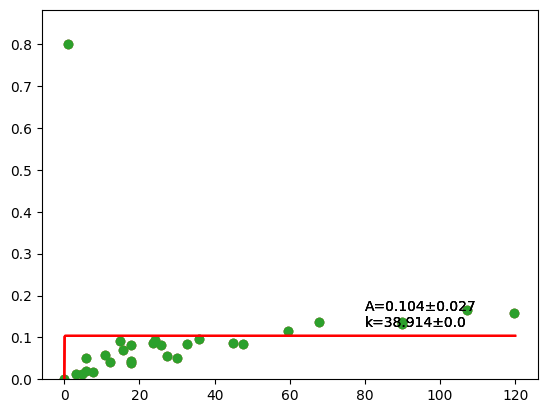

In [50]:
def example_curve(x_list, y_list):
    df_feature = pd.DataFrame({'x': x_list, 'y': y_list})
    x = x_list
    y = y_list
    
    '''
    Generate Initial Curve
    '''
#     print("initial curve_fitting")
    coeffs = curve_fitting(df_feature,random_iterations=3, color='red', plot_in_console=True)

#     '''
#     Remove Outliers
#     '''
#     if type(coeffs) != bool:
#         A, k = coeffs
#         print("[A,k]:",A,",",k)
#         C = 0
        
#         try:
#             H = (np.log((((A/2)/A)-1)*-1))/-k # half-life
#             print("Half-life:", H)
#         except:
#             H = np.nan
#             print("Half-life:", H)
#         try:
#             chisquared = calculate_residuals(df_feature, coeffs)
#             RSDR = get_RSDR(coeffs, df_feature)
#             print("Chi squard:", chisquared)
#             print("RSDR:", RSDR)
#         except:
#             print("error in calculation chisquared or RSDR (possible poor curve fitting)")
#             chisquared = np.nan
#             RSDR = np.nan
#         print("Checking for outliers")
#         df_feature, outliers_detected, n_used = remove_outliers(df_feature, coeffs)
#         print("Outliers detected and removed:", outliers_detected)
#         while outliers_detected > 0:
#             print("Recalculating curve")
#             coeffs = curve_fitting(df_feature)
#             if type(coeffs) != bool:
#                 A,k = coeffs
#                 print("[A,k]:",A,",",k)
#                 C = 0
#                 try:
#                     H = (np.log((((A/2)/A)-1)*-1))/-k # half-life
#                     print("Half-life:", H)
#                 except:
#                     H = np.nan
#                     print("Half-life:", H)
#                 try:
#                     chisquared = calculate_residuals(df_feature, coeffs)
#                     RSDR = get_RSDR(coeffs, df_feature)
#                     print("Chi squard:", chisquared)
#                     print("RSDR:", RSDR)
#                 except:
#                     print("error in calculation chisquared or RSDR (possible poor curve fitting)")
#                     chisquared = np.nan
#                     RSDR = np.nan
#                 print("Checking for outliers")
#                 df_feature, outliers_detected, n_used = remove_outliers(df_feature, coeffs)
#                 print("Outliers detected and removed:", outliers_detected)
#             else:
#                 chisquared, A, k, C, H = [np.nan, np.nan, np.nan, np.nan, np.nan]
#                 n_used = 0
#                 break
#     else:
#         chisquared, A, k, C, H = [np.nan, np.nan, np.nan, np.nan, np.nan]
#         n_used = 0
#     lower_x = 0
#     upper_x = 140
#     step_x = 0.01
    try:
        if type(coeffs_initial) != bool:

            t = curve_range = np.arange(0,upper_x,0.01)
            s = curve_data = model(curve_range,A,k)
        else:
            chisquared, RSDR, A, k, C, H = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
            n_used = 0
            t = np.nan
            s = np.nan

    except:
        t = np.nan
        s = np.nan
    
    
    return

'''
Example data set
'''
x_list = [1,0,3,4.75,5.666666667,5.75,7.6,10.78333333,12.18333333,14.78333333,15.73333333,17.75,17.76666667,17.81666667,23.53333333,24.16666667,25.76666667,27.31666667,29.93333333,32.66666667,35.88333333,44.78333333,47.5,59.58333333,67.88333333,89.76666667,89.83333333,107.2,119.7166667]
y_list = [0.8,0,0.011635376,0.01205788,0.0509542,0.019029791,0.017741336,0.057440817,0.040689357,0.091717184,0.07081078,0.081946418,0.044566058,0.039326504,0.086661801,0.094272077,0.082630873,0.056210607,0.051231094,0.083449088,0.095866196,0.08559528,0.085047297,0.116140626,0.137561575,0.137194544,0.132068843,0.165178776,0.15894556]
example_curve(x_list, y_list)

In [51]:
def calculate_residuals(dataframe_x_y,coeffs):
    A, k = coeffs
    this_data = dataframe_x_y[pd.isna(dataframe_x_y.y) == False]
    this_data['Predicted'] = model(this_data.x, A, k)
    this_data['|Residual|'] = abs(this_data['Predicted'] - this_data['y'])
    this_data['|Residual|^2'] = this_data['|Residual|']**2
    chisquared = float(sum(this_data['|Residual|^2']))
    return chisquared

def initial_curve_plot(x_list,y_list, color, plot_in_console):
    upper_x = 120 #Determines the x-limit of the chart
    df_feature = pd.DataFrame({'x': x_list, 'y': y_list})
    x = x_list
    y = y_list
    '''
    Generate Initial Curve
    '''
    coeffs, perr = curve_fitting(df_feature,random_iterations=1, color=color, plot_in_console=plot_in_console)
    A,k=coeffs
    t = curve_range = np.arange(0,upper_x,0.01)
    s = curve_data = model(curve_range,A,k)
    '''
    Check ChiSquared for data against curve (RSDR makes more sense for non-linear)
    '''
    ChiSquared = calculate_residuals(df_feature,coeffs)    
    return(coeffs,perr,t,s,ChiSquared)

   

In [52]:
def plot_to_excel(data_type, treatment_dfs_dictionary):
    book_name = data_type + '_output'
    excel_file = book_name + '.xlsx'
    with pd.ExcelWriter(excel_file, engine = "xlsxwriter") as writer:
    #     writer = pd.ExcelWriter(excel_file, engine = "xlsxwriter") # Assign name of function to use for excel manipulation (excel data file is assigned here)
        for treatment,data_df in treatment_dfs_dictionary.items():
            x_axis_column = 'Total labelling time (min) corrected' #set up the labels like this so I can send to function later if desired. Must match column header from dataframe
            x_axis_label = str(x_axis_column)
            y_axis_column = data_type
            y_axis_label = str(y_axis_column)
            cell_letter = 'D'
            cell_number = 1
            data_df[x_axis_column] = data_df[x_axis_column].astype(float)
            data=data_df
            end_index = data_df.columns.get_loc('Group') #First column to exclude
            exp_stats = pd.DataFrame(index = ['A','SD of A', 'k', 'SD of k', 'Chi^2']) #Dataframe will hold info on curves for sheet
            first_t = True
            for feature in data_df.iloc[:,1:end_index]:
                '''
                Get curve for data
                '''
                df_for_curve = data_df[data_df[feature]>0]
                x = df_for_curve['Total labelling time (min) corrected'].tolist()
                x.append(0)
                y = df_for_curve[feature].tolist()
                y.append(0)
                
                plot_in_console=False
                if plot_in_console:
                    plt.clf()
                coeffs,perr,t,s,ChiSquared = initial_curve_plot(x_list=x,y_list=y,color='black', plot_in_console=plot_in_console)
                A_SD, k_SD = perr
                A,k = coeffs
                if plot_in_console:
                    print(f'\n{treatment} {feature}')
                    print(f'A = {A.round(5)} +- {A_SD.round(5)}\nk = {k.round(5)} +- {k_SD.round(5)}\nChi^2 = {round(ChiSquared,5)}')
                    plt.show()
                '''
                Add information about curve into dataframe for sheet
                '''    
                exp_stats[feature] = A,A_SD,k,k_SD,ChiSquared
                '''
                Add data required to plot curve in excel into dataframe for sheet
                '''
                if first_t:
                    exp_curves = pd.DataFrame()
                    exp_curves[x_axis_label] = t
                    first_t = False
                exp_curves[feature]=s
            '''
            Convert dataframe to excel format in selected sheet
            '''
            data_sheet_name = data_type + '-' + treatment
            data.to_excel(writer, sheet_name = data_sheet_name)
            exp_curves_sheet_name = 'Exp curves' + treatment
            exp_curves.to_excel(writer, sheet_name = exp_curves_sheet_name)
            exp_stats_sheet_name = 'Exp stats' + treatment
            exp_stats.to_excel(writer, sheet_name = exp_stats_sheet_name)
            '''
            Start making excel charts (reiterate the treatment dataframe for clarity)
            '''
            for feature in data_df.iloc[:,1:end_index]:
                '''
                Data points as scatter plot first
                '''
                workbook = writer.book # workbook is the whole excel workbook
                worksheet = writer.sheets[data_sheet_name] # worksheet is the individual sheet in the workbook        
                max_rows = len(data) #data is the data_df in excel format
                chart_title = feature
                chart_cell = cell_letter + str(cell_number)    
                col_x = data.columns.get_loc(x_axis_label) + 1 # Excel starts counting columns at 1 (not 0)
                col_y = data.columns.get_loc(feature) + 1
                this_chart = workbook.add_chart({'type': 'scatter'})
                this_chart.add_series({
                    'name': chart_title,
                    'categories': [data_sheet_name, 1, col_x, max_rows, col_x],
                    'values': [data_sheet_name, 1, col_y, max_rows, col_y],
                    'marker': {'type': 'circle', 'size': 4},
            #         'trendline': {'type': 'linear', 'display_equation': True, 'display_r_squared': True},
                    'line': {'none': True},
                    'border': {'none': True} 
                    })
                '''
                Exponential curve next
                '''
                if data_df[feature].count() > 3: # Don't bother plotting if there are not > 3 data points for this feature
                    try:
                        worksheet2 = writer.sheets[exp_curves_sheet_name] # worksheet is the individual sheet in the workbook
                        max_rows_exponential = len(exp_curves)
                        col_x_exponential = exp_curves.columns.get_loc(x_axis_label) + 1
                        col_y_exponential = exp_curves.columns.get_loc(feature) + 1              
                        this_chart.add_series(
                            {
                            'subtype': 'smooth',
                            'name': 'exponential curve',
                            'categories': [exp_curves_sheet_name, 1, col_x_exponential, max_rows_exponential, col_x_exponential],
                            'values': [exp_curves_sheet_name, 1, col_y_exponential, max_rows_exponential, col_y_exponential],
                            'marker': {'type': 'none'},
                            'line': {'type': 'smooth', 'color': 'red'}
                            })
                        line_chart = workbook.add_chart({'type': 'scatter', 'subtype': 'smooth'})
                        line_chart.add_series(
                            {
                            'name': chart_title,
                            'categories': [sheet_name_exponential, 1, col_x_exponential, max_rows_exponential, col_x_exponential],
                            'values': [sheet_name_exponential, 1, col_y_exponential, max_rows_exponential, col_y_exponential],
                            'marker': {'type': 'none'},
                            'line': {'color': 'red'}
                    #         'border': {'none': True} 
                            })
                    #     this_chart.add_series({'type': 'line'})
                        curve_for_feature = True
                    except:
                        curve_for_feature = False
                else:
                    curve_for_feature = False
                '''
                Chart formatting
                '''
                this_chart.set_x_axis({
                    'name': x_axis_label,
                    'num_font': {'size': 12, 'name': 'Arial', 'color': 'black'},
                    'name_font': {'size': 12, 'name': 'Arial', 'color': 'black', 'bold': False},
                    'line': {'color': 'black'},
                    'min': 0,
                    'max': 130,
                    'major_unit': 20,
                    'crossing': 0,
                    'major_gridlines': {'visible': False},
                    'minor_gridlines': {'visible': False},
                    'major_tick_marks': 'outside',
                    'minor_tick_marks': 'none'
                })
                this_chart.set_y_axis({
                    'name': y_axis_label,
                    'num_font': {'size': 12, 'name': 'Arial', 'color': 'black'},
                    'name_font': {'size': 12, 'name': 'Arial', 'color': 'black', 'bold': False},
                    'line': {'color': 'black'},
                    'min': 0,
                    'crossing': 0,
                    'major_gridlines': {'visible': False},
                    'minor_gridlines': {'visible': False},
                    'major_tick_marks': 'outside',
                    'minor_tick_marks': 'none'
                })

                this_chart.set_title({
                        'name': chart_title,
                        'name_font': {'size': 12, 'bold': False, 'name':'Arial', 'color':'black'}
                    })
                this_chart.set_size({
                        'width': 400, 'height':300
                    })
                this_chart.set_legend({
                        'none': True
                    })
                this_chart.set_chartarea({
                    'border': {'none': True},
                    'fill':   {'color': 'white'}
                })
            #     line_chart.combine(this_chart)
                worksheet.insert_chart(chart_cell, this_chart)
                if curve_for_feature == True:
                    worksheet2.insert_chart(chart_cell, line_chart)


                cell_number += 16
            print('charts plotted for', treatment, data_type)
#     writer.save()
    return print('\ncharts plotted for', data_type, ' and saved to', excel_file, '\n')
plot_to_excel(data_type='F', treatment_dfs_dictionary=treatment_dfs_dictionary)

C:\Users\Matt\AppData\Local\Temp\ipykernel_35704\3600215373.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[x_axis_column] = data_df[x_axis_column].astype(float)
c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


charts plotted for Control F
charts plotted for normal O2 F
charts plotted for low O2 F

charts plotted for F  and saved to F_output.xlsx 



In [53]:
def plot_label_curve(feature, treatment_dfs_dictionary,plot_in_console):
    plt.clf()
    color_list=['red','blue','orange','green','purple','yellow','cyan']
    colorid=0
    for name,df in treatment_dfs_dictionary.items():
        df = df[df[feature]>0]
        x = df['Total labelling time (min) corrected'].tolist()
        x.append(0)
        y = df[feature].tolist()
        y.append(0)
        if colorid < len(color_list):
            color = color_list[colorid]
        else:
            colorid = 0
            color = color_list[colorid]
        
        if plot_in_console:
            print(f'{name} {feature} ({color})')
            plt.plot(x, y, 'o', color=color, label = name)
        else:
            print(f'\n{name} {feature}')
        initial_curve_plot(x_list=x,y_list=y,color=color, plot_in_console=plot_in_console)
        colorid +=1
    if plot_in_console:
        plt.title(label=feature)
        plt.legend(loc = "upper right")
        plt.xlabel('Total labelling time (min) corrected')
        plt.ylabel('Normalized fractional labeling')
        plt.show()
    return

In [60]:
# quit()

In [54]:
for feature in profile_df['Peak']:  
    plot_label_curve(feature, treatment_dfs_dictionary, plot_in_console=False)


Control *Glyoxylate (MeOx & TMS)

normal O2 *Glyoxylate (MeOx & TMS)

low O2 *Glyoxylate (MeOx & TMS)

Control *Pyruvate (MeOx & TMS)

normal O2 *Pyruvate (MeOx & TMS)

low O2 *Pyruvate (MeOx & TMS)

Control *Glycolate (2TMS)

normal O2 *Glycolate (2TMS)

low O2 *Glycolate (2TMS)

Control *Serine (2TMS)

normal O2 *Serine (2TMS)

low O2 *Serine (2TMS)

Control *Glycine (3TMS)

normal O2 *Glycine (3TMS)

low O2 *Glycine (3TMS)

Control *Glycerate (3TMS)

normal O2 *Glycerate (3TMS)

low O2 *Glycerate (3TMS)

Control Fumarate (2TMS)

normal O2 Fumarate (2TMS)

low O2 Fumarate (2TMS)

Control Malate (3TMS)

normal O2 Malate (3TMS)

low O2 Malate (3TMS)

Control Cinnamate (1TMS)

normal O2 Cinnamate (1TMS)

low O2 Cinnamate (1TMS)

Control (IS) Tropate (2TMS)

normal O2 (IS) Tropate (2TMS)

low O2 (IS) Tropate (2TMS)

Control (IS) Lyxose (MeOx & 4TMS)

normal O2 (IS) Lyxose (MeOx & 4TMS)

low O2 (IS) Lyxose (MeOx & 4TMS)

Control (IS) Ribitol (5TMS)

normal O2 (IS) Ribitol (5TMS)

low O2 

<Figure size 640x480 with 0 Axes>

In [55]:

def plot_label_boxplot():
    return

def plot_area_boxplot(feature, treatment_dfs_dictionary_Areas, groupnames, yaxis):
    boxplot_list = []
    for name,df in treatment_dfs_dictionary_Areas.items():
        x = df['Total labelling time (min) corrected'].tolist()
        y = df[feature].tolist()
        y_filtered = [value for value in y if np.isnan(value) == False]
        boxplot_list.append(y_filtered)
    #         plt.clf()
    #         plt.scatter(x,y)
    #         plt.title(label=feature)
    #         plt.show()
#             plt.plot(x, y, 'o')
    try:
        a,b = boxplot_list[0],boxplot_list[1]
    #     t, p = ttest_ind(a, b, equal_var=False) # t-test
        U1, p = MannwhitneyuResult = sps.mannwhitneyu(a,b)
        SDa = np.std(a)
        SDb = np.std(b)

        try:
            meana = np.mean(a)
            meanb = np.mean(b)
            plt.annotate(f'mean={meana.round(5)}\nSD={SDa.round(5)}', xy=(1.1,meana), xytext=(1.1, meana))
            plt.annotate(f'mean={meanb.round(5)}\nSD={SDb.round(5)}\np={p.round(5)}', xy=(2.1, meanb), xytext=(2.1, meanb))
        except:
            print("error")
        plt.boxplot(boxplot_list)
        plt.title(label=feature)
    #         plt.legend(treatments)
        plt.xlabel('Group')

        plt.xticks(np.arange(1,boxplot_ticks,1), labels=treatments, rotation=20)
        plt.ylabel(yaxis)
        plt.show()
    except:
        print(f'Could not generate boxplot for {feature} {yaxis}')
    return

In [63]:
## Not functional

# from sklearn.decomposition import PCA

# def draw_vector(v0, v1, ax=None):
#     ax = ax or plt.gca()
#     arrowprops=dict(arrowstyle='->',
#                     linewidth=2,
#                     shrinkA=0, shrinkB=0)
#     ax.annotate('', v1, v0, arrowprops=arrowprops)






# def pca_areas(df, features):
#     df = df.replace(np.NaN, 0)
# #     print(df[features])
#     pca = PCA()
#     components = pca.fit_transform(df[features])
#     print(components)
#     labels = {
#         str(i): f"PC {i+1} ({var:.1f}%)"
#         for i, var in enumerate(pca.explained_variance_ratio_ * 100)
#     }
#     print(labels)
#     pca.fit(df[features])
#     print(pca.components_)
#     print(pca.explained_variance_)
    
#     # plot data
#     plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
#     for length, vector in zip(pca.explained_variance_, pca.components_):
#         v = vector * 3 * np.sqrt(length)
#         draw_vector(pca.mean_, pca.mean_ + v)
#     plt.axis('equal');


# pca_areas(df=dictionary_of_dfs['rel_areas_df'], features=profile_df['Peak'].tolist())

Control *Glyoxylate (MeOx & TMS) (red)
normal O2 *Glyoxylate (MeOx & TMS) (blue)
low O2 *Glyoxylate (MeOx & TMS) (orange)


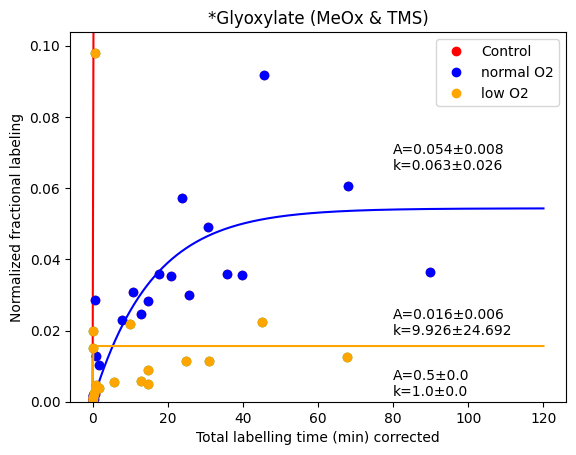

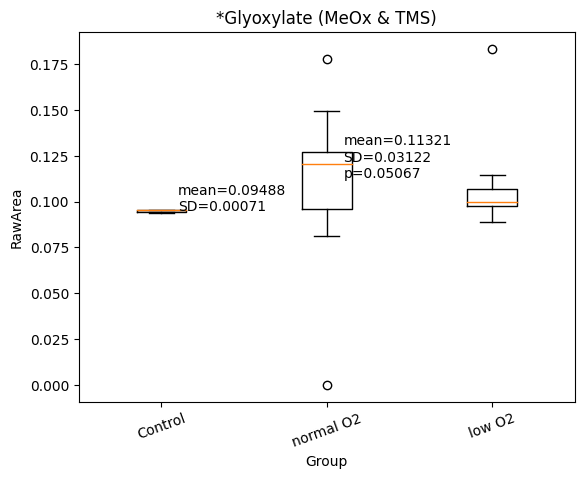

Control *Pyruvate (MeOx & TMS) (red)
normal O2 *Pyruvate (MeOx & TMS) (blue)
low O2 *Pyruvate (MeOx & TMS) (orange)


c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


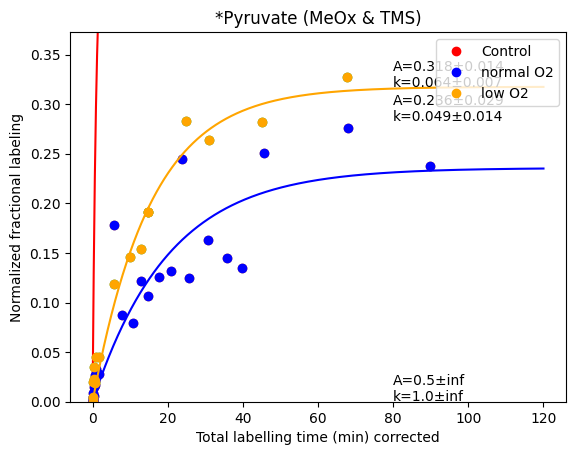

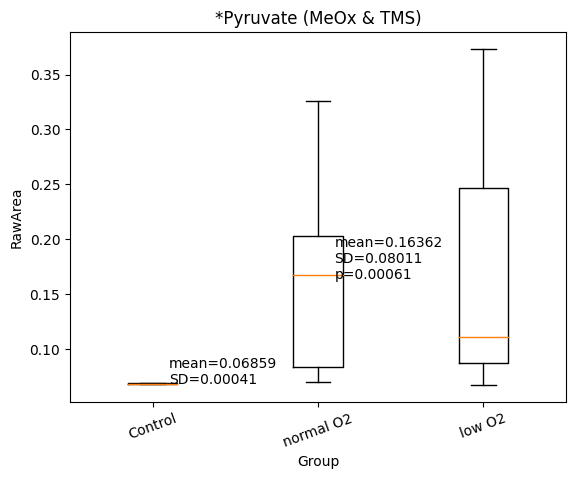

Control *Glycolate (2TMS) (red)
normal O2 *Glycolate (2TMS) (blue)
low O2 *Glycolate (2TMS) (orange)


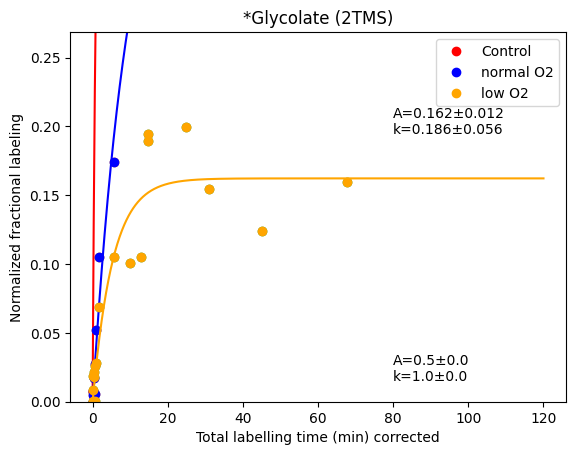

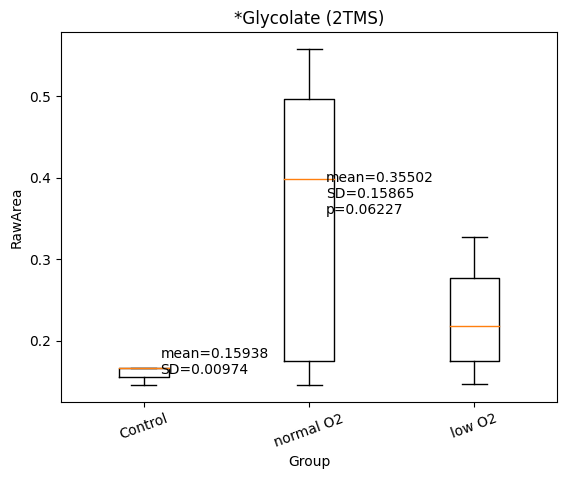

Control *Serine (2TMS) (red)
normal O2 *Serine (2TMS) (blue)
low O2 *Serine (2TMS) (orange)


c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


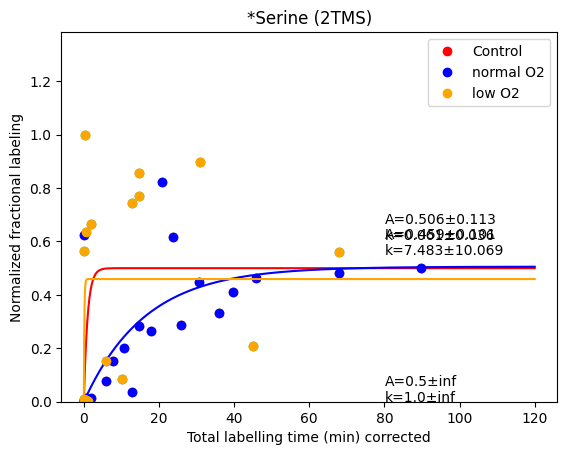

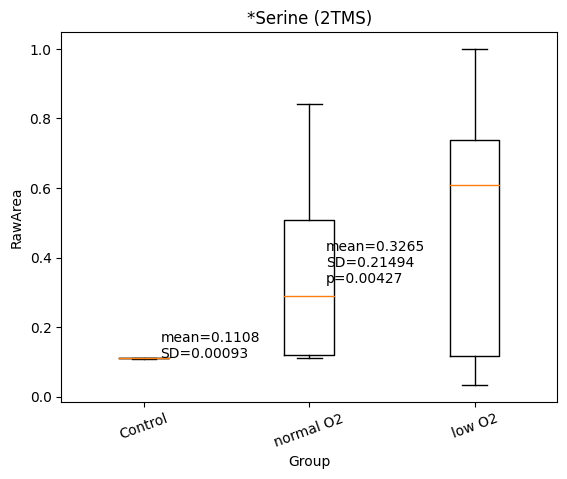

Control *Glycine (3TMS) (red)
normal O2 *Glycine (3TMS) (blue)
low O2 *Glycine (3TMS) (orange)


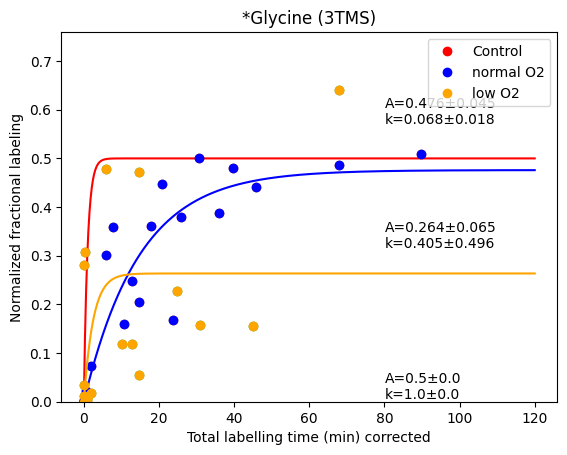

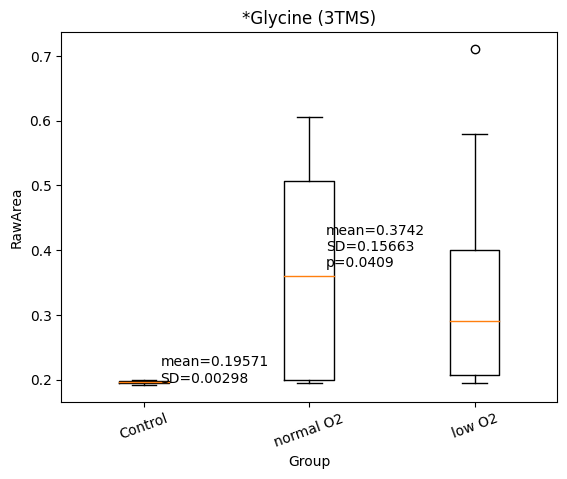

Control *Glycerate (3TMS) (red)
normal O2 *Glycerate (3TMS) (blue)
low O2 *Glycerate (3TMS) (orange)


c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


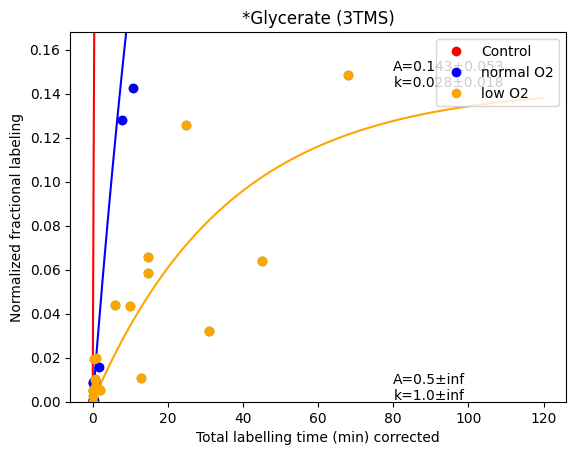

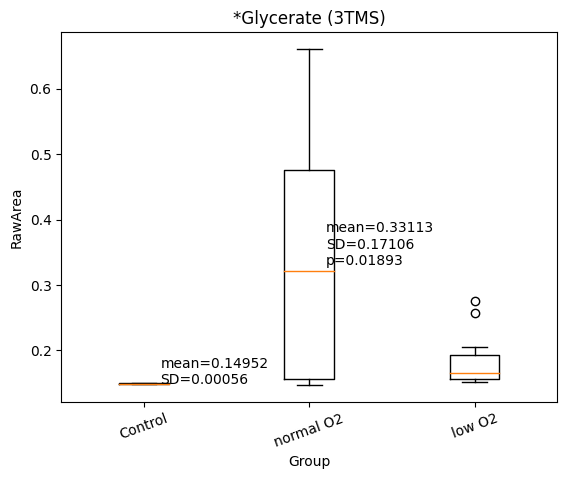

Control Fumarate (2TMS) (red)
normal O2 Fumarate (2TMS) (blue)
low O2 Fumarate (2TMS) (orange)


c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


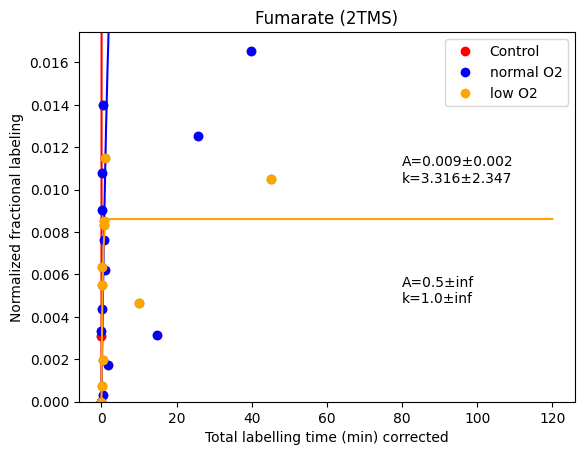

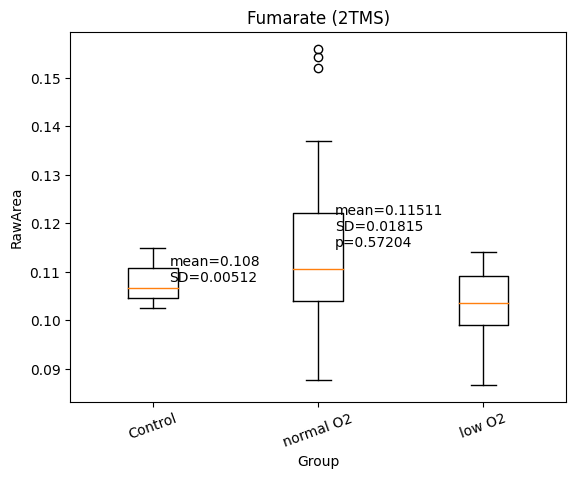

Control Malate (3TMS) (red)
normal O2 Malate (3TMS) (blue)
low O2 Malate (3TMS) (orange)


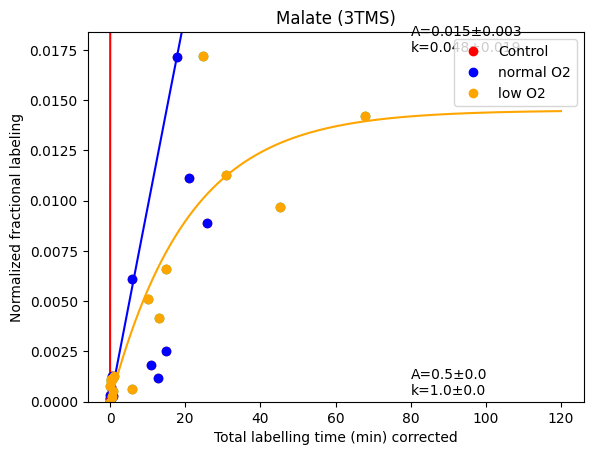

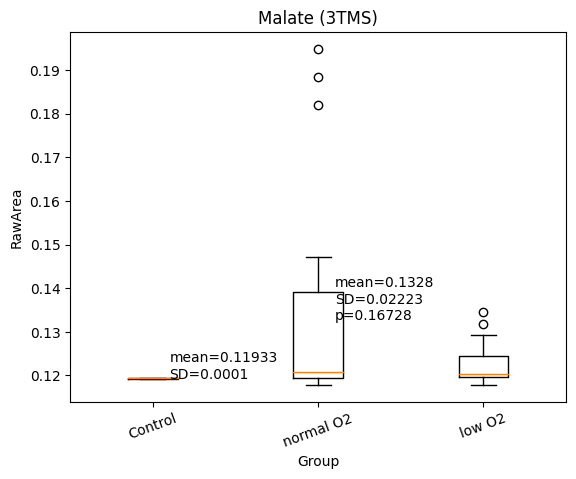

Control Cinnamate (1TMS) (red)
normal O2 Cinnamate (1TMS) (blue)
low O2 Cinnamate (1TMS) (orange)


c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Matt\AppData\Local\Temp\ipykernel_35704\3388683745.py:63: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim(0,upper_y)


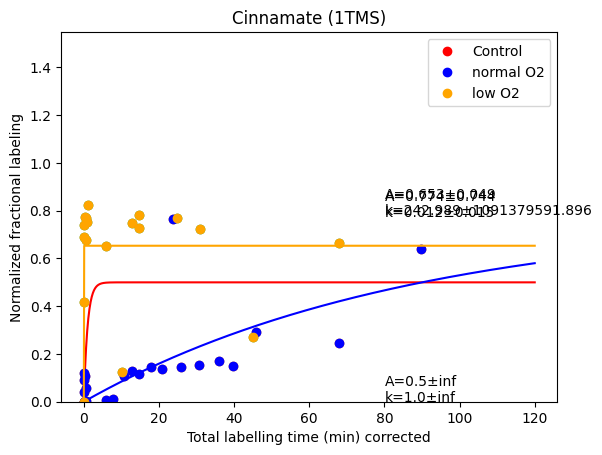

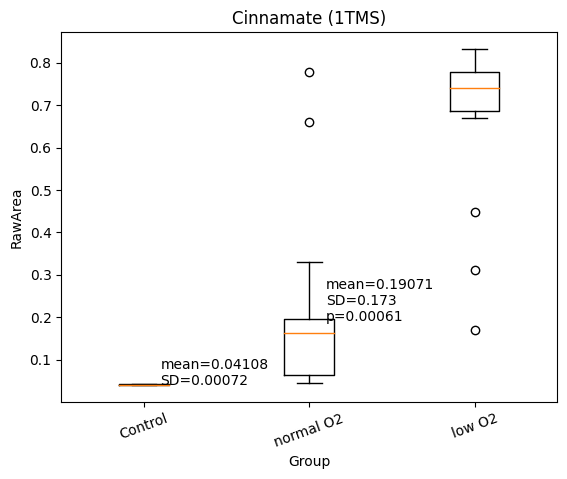

Control (IS) Tropate (2TMS) (red)
normal O2 (IS) Tropate (2TMS) (blue)
low O2 (IS) Tropate (2TMS) (orange)


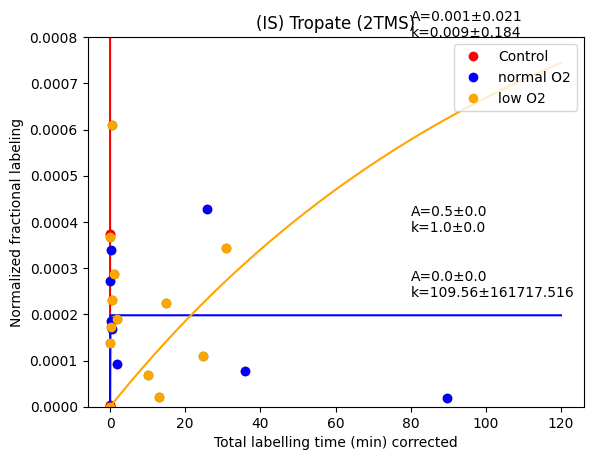

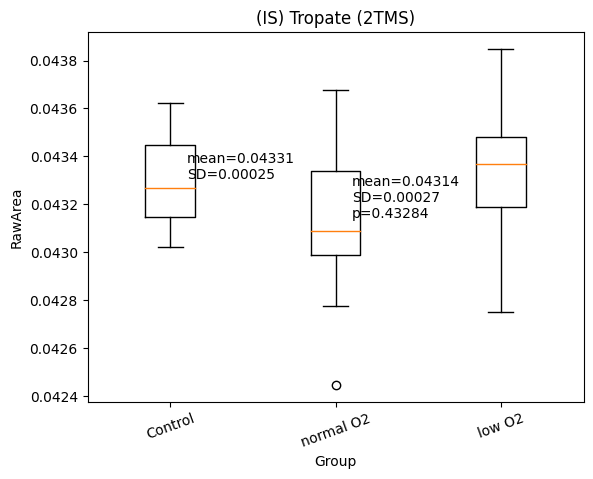

Control (IS) Lyxose (MeOx & 4TMS) (red)
normal O2 (IS) Lyxose (MeOx & 4TMS) (blue)
low O2 (IS) Lyxose (MeOx & 4TMS) (orange)


c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


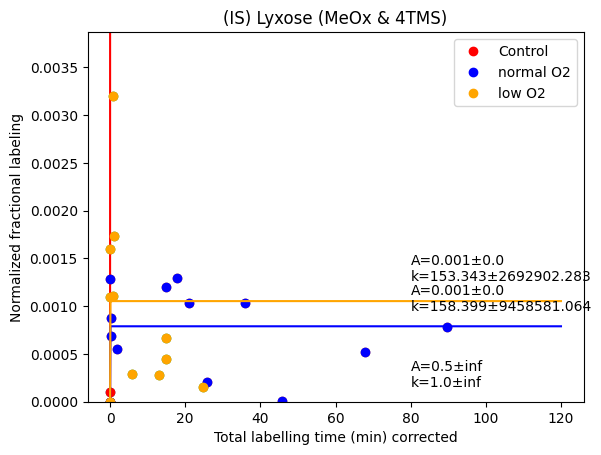

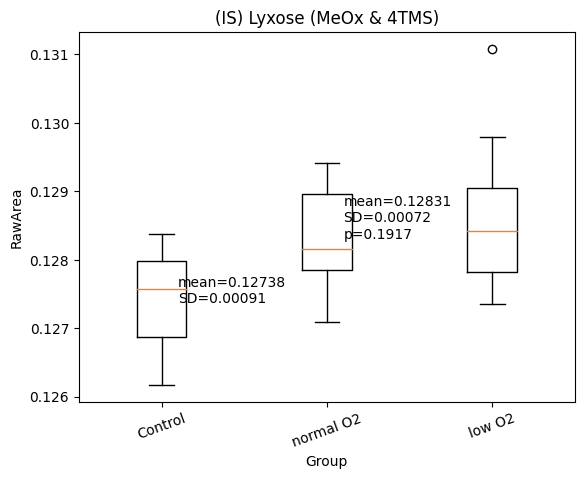

Control (IS) Ribitol (5TMS) (red)
normal O2 (IS) Ribitol (5TMS) (blue)
low O2 (IS) Ribitol (5TMS) (orange)


c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


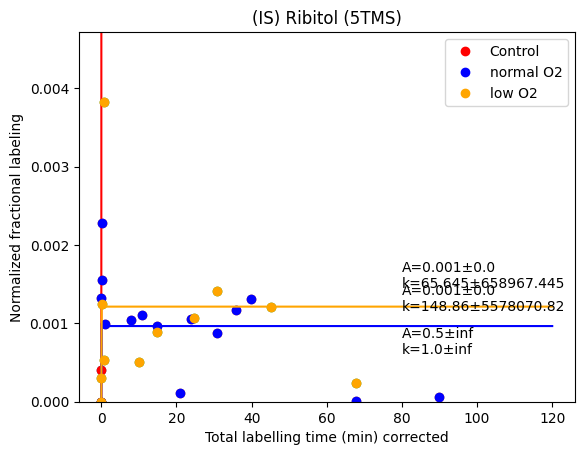

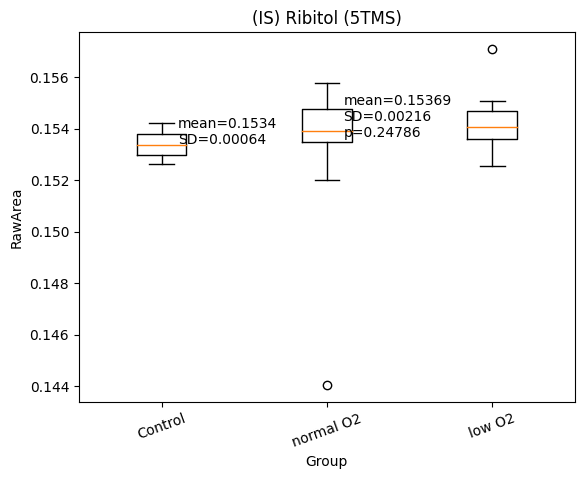

Control *Shikimate (4TMS) (red)
normal O2 *Shikimate (4TMS) (blue)
low O2 *Shikimate (4TMS) (orange)


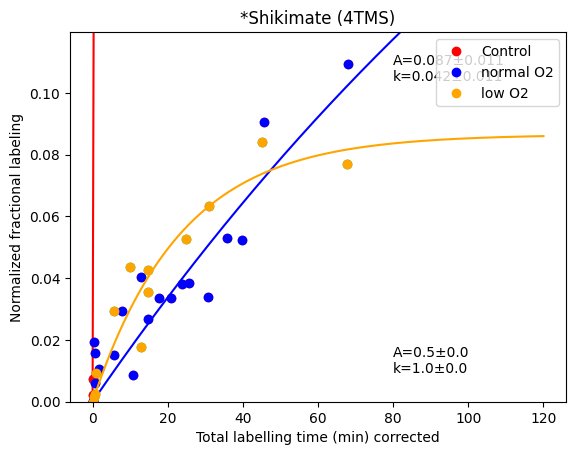

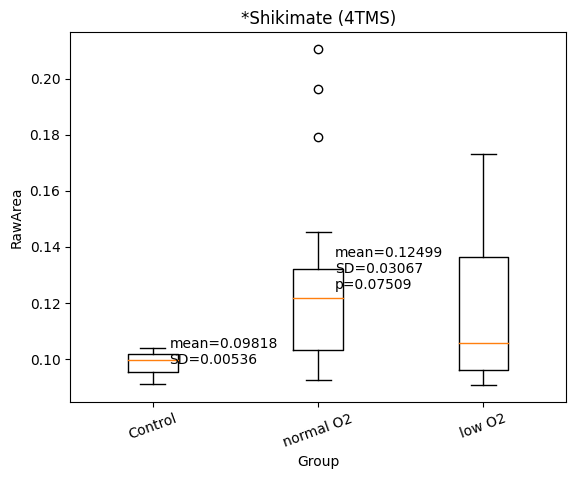

Control Fructose (MeOx & 5TMS) (red)
normal O2 Fructose (MeOx & 5TMS) (blue)
low O2 Fructose (MeOx & 5TMS) (orange)


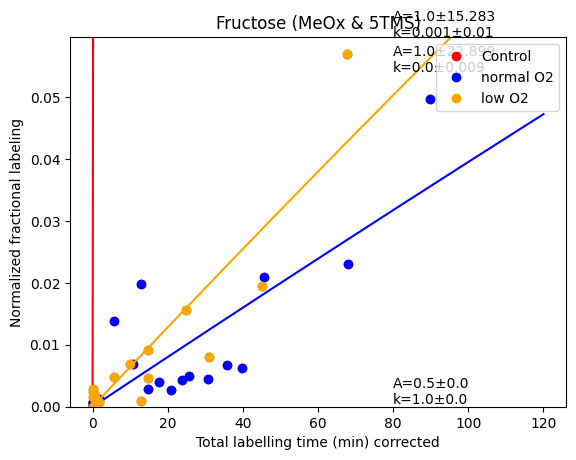

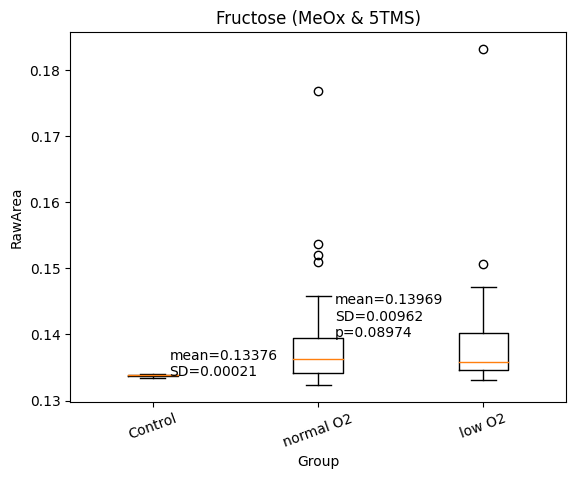

Control Glucose (MeOx & 5TMS) (red)
normal O2 Glucose (MeOx & 5TMS) (blue)
low O2 Glucose (MeOx & 5TMS) (orange)


c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Matt\AppData\Local\Temp\ipykernel_35704\3388683745.py:63: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim(0,upper_y)


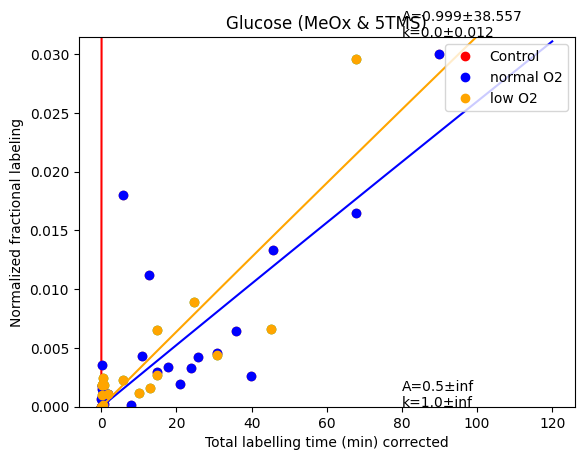

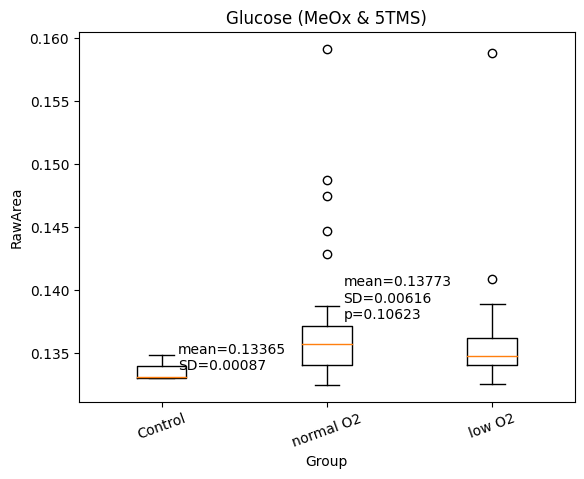

Control (IS) Octyl Glycoside (4TMS) (red)
normal O2 (IS) Octyl Glycoside (4TMS) (blue)
low O2 (IS) Octyl Glycoside (4TMS) (orange)


c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


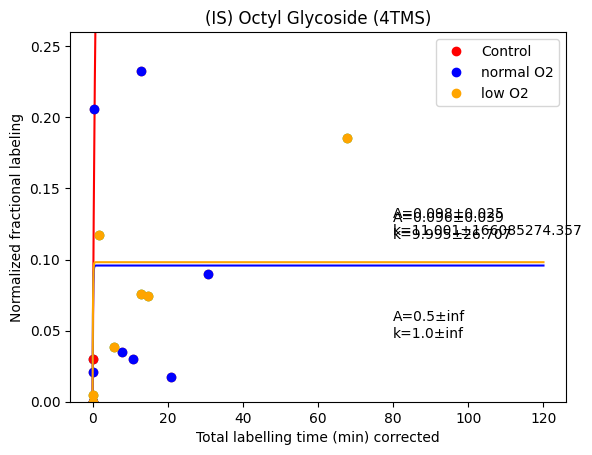

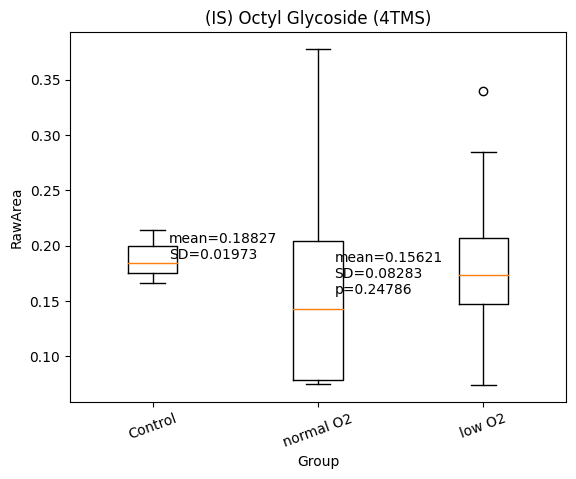

In [56]:
# x = np.linspace(0, 10, 30)
# y = np.sin(x)
# plt.plot(x, y, 'o', color='black');
boxplot_ticks = number_of_treatments + 1
legendlabels = np.repeat(treatments, 2)

for feature in profile_df['Peak']:  
    plot_label_curve(feature, treatment_dfs_dictionary, plot_in_console=True)
    if use_areas == True:
        plot_area_boxplot(feature, treatment_dfs_dictionary_RawAreas, boxplot_ticks, 'RawArea')
#         plot_area_boxplot(feature, treatment_dfs_dictionary_RelAreas, boxplot_ticks, 'RelArea') # This is commented out because I suspect an error in RelArea table
        
if use_areas == True:
    feature_list = profile_df['Peak'].tolist()
    

In [57]:
for feature in profile_df['Peak']:  
#     plot_label_curve(feature, treatment_dfs_dictionary, legendlabels)
    for name,df in treatment_dfs_dictionary.items():
        df = df[df[feature]>0]
        x = df['Total labelling time (min) corrected'].tolist()
        x.append(0)
        y = df[feature].tolist()
        y.append(0)

        print(f'{name} ({feature})')
        
    

Control (*Glyoxylate (MeOx & TMS))
normal O2 (*Glyoxylate (MeOx & TMS))
low O2 (*Glyoxylate (MeOx & TMS))
Control (*Pyruvate (MeOx & TMS))
normal O2 (*Pyruvate (MeOx & TMS))
low O2 (*Pyruvate (MeOx & TMS))
Control (*Glycolate (2TMS))
normal O2 (*Glycolate (2TMS))
low O2 (*Glycolate (2TMS))
Control (*Serine (2TMS))
normal O2 (*Serine (2TMS))
low O2 (*Serine (2TMS))
Control (*Glycine (3TMS))
normal O2 (*Glycine (3TMS))
low O2 (*Glycine (3TMS))
Control (*Glycerate (3TMS))
normal O2 (*Glycerate (3TMS))
low O2 (*Glycerate (3TMS))
Control (Fumarate (2TMS))
normal O2 (Fumarate (2TMS))
low O2 (Fumarate (2TMS))
Control (Malate (3TMS))
normal O2 (Malate (3TMS))
low O2 (Malate (3TMS))
Control (Cinnamate (1TMS))
normal O2 (Cinnamate (1TMS))
low O2 (Cinnamate (1TMS))
Control ((IS) Tropate (2TMS))
normal O2 ((IS) Tropate (2TMS))
low O2 ((IS) Tropate (2TMS))
Control ((IS) Lyxose (MeOx & 4TMS))
normal O2 ((IS) Lyxose (MeOx & 4TMS))
low O2 ((IS) Lyxose (MeOx & 4TMS))
Control ((IS) Ribitol (5TMS))
norma

In [66]:
'''
Retention index
'''

'\nRetention index\n'

In [67]:
'''
Adduct ratios
'''

'\nAdduct ratios\n'

In [68]:
'''
Compare to predicted F unlabeled (natural abundance)
'''

'\nCompare to predicted F unlabeled (natural abundance)\n'

In [69]:
'''
Curves
'''

'\nCurves\n'

In [70]:
'''
Graph into excel
'''

'\nGraph into excel\n'

In [71]:
'''
set this up into modules based on function
'''


'\nset this up into modules based on function\n'

In [72]:
'''
Make super simple version for metaboanalyst upload.

Add in curves, sample data etc...
'''

'\nMake super simple version for metaboanalyst upload.\n\nAdd in curves, sample data etc...\n'

In [73]:
quit()

: 